In [137]:
# the standard boilerplate stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from IPython.display import HTML, display
from pandas import Series, DataFrame

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns',500)

In [138]:
# turn off matplotlib interactive mode
plt.ioff()

In [139]:
EPL_DIR = r"EPL\data"

In [140]:
epl18_19=pd.read_csv(EPL_DIR + r"\season-1819_csv.csv")

In [141]:
epl18_19.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

We can rename the column headers to be more meaningful

In [142]:
new_cols = {"FTHG":"FullTime_HomeTeam_Goals",
             "FTAG":"FullTime_AwayTeam_Goals",
             "FTR":"FullTime_Result",
             "HTHG":"HalfTime_HomeTeam_Goals",
             "HTAG":"HalfTime_AwayTeam_Goals",
             "HTR":"HalfTime_Result", 
             "HS":"HomeTeam_Shots",
             "AS":"AwayTeam_Shots",
             "HST":"HomeTeam_ShotsOnTarget",
             "AST":"AwayTeam_ShotsOnTarget",
             "HF":"HomeTeam_FoulsCommitted",
             "AF":"AwayTeam_FoulsCommitted",
             "HC":"HomeTeam_Corners",
             "AC":"AwayTeam_Corners",
             "HY":"HomeTeam_YellowCards",
             "AY":"AwayTeam_YellowCards",
             "HR":"HomeTeam_RedCards",
             "AR":"AwayTeam_RedCards",            
           }

We can convert the data into time series by usng date as Index

In [143]:
def load_data(basedir, filename, season):
    print("Loading",season,"data from",filename)
    df = pd.read_csv(basedir + '\\' + filename)
    df['Season']=season
    df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Season']]
    df.rename(columns = new_cols, inplace=True)
    df.set_index('Date', inplace=True)
    print("Data Shape :",df.shape)
    display(HTML(df.head().to_html()))
    return df

In [144]:
df18_19 = load_data(EPL_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(EPL_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(EPL_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(EPL_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(EPL_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(EPL_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(EPL_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(EPL_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(EPL_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (120, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-10,Man United,Leicester,2,1,H,1,0,H,8,13,6,4,11,8,2,5,2,1,0,0,2018-2019
2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,4,1,11,9,7,4,1,1,0,0,2018-2019
2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,6,9,9,11,5,5,1,2,0,0,2018-2019
2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,1,4,9,8,2,5,2,1,0,0,2018-2019
2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,15,15,2,5,11,12,3,5,2,2,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,27,6,10,3,9,12,9,4,0,1,0,0,2017-2018
2017-08-12,Brighton,Man City,0,2,A,0,0,D,6,14,2,4,6,9,3,10,0,2,0,0,2017-2018
2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,19,10,6,5,16,11,8,5,3,3,2,0,2017-2018
2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,4,6,7,19,12,9,1,3,0,0,2017-2018
2017-08-12,Everton,Stoke,1,0,H,1,0,H,9,9,4,1,13,10,6,7,1,1,0,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-13,Burnley,Swansea,0,1,A,0,0,D,10,17,3,9,10,14,7,4,3,2,0,0,2016-2017
2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,14,13,4,3,12,15,3,6,2,2,0,0,2016-2017
2016-08-13,Everton,Tottenham,1,1,D,1,0,H,12,13,6,4,10,14,5,6,0,0,0,0,2016-2017
2016-08-13,Hull,Leicester,2,1,H,1,0,H,14,18,5,5,8,17,5,3,2,2,0,0,2016-2017
2016-08-13,Man City,Sunderland,2,1,H,1,0,H,16,7,4,3,11,14,9,6,1,2,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,11,7,2,3,13,13,6,3,3,4,0,0,2015-2016
2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,11,18,3,10,15,16,4,8,1,3,1,0,2015-2016
2015-08-08,Everton,Watford,2,2,D,0,1,A,10,11,5,5,7,13,8,2,1,2,0,0,2015-2016
2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,19,10,8,5,13,17,6,3,2,4,0,0,2015-2016
2015-08-08,Man United,Tottenham,1,0,H,1,0,H,9,9,1,4,12,12,1,2,2,3,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,14,4,6,2,13,19,9,3,2,2,0,1,2014-2015
2014-08-16,Leicester,Everton,2,2,D,1,2,A,11,13,3,3,16,10,3,6,1,1,0,0,2014-2015
2014-08-16,Man United,Swansea,1,2,A,0,1,A,14,5,5,4,14,20,4,0,2,4,0,0,2014-2015
2014-08-16,QPR,Hull,0,1,A,0,0,D,19,11,6,4,10,10,8,9,1,2,0,0,2014-2015
2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,12,7,2,2,14,9,2,8,0,3,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,16,9,4,4,15,18,4,3,4,5,1,0,2013-2014
2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,26,10,11,4,11,11,12,6,1,1,0,0,2013-2014
2013-08-17,Norwich,Everton,2,2,D,0,0,D,8,19,2,6,13,10,6,8,2,0,0,0,2013-2014
2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,20,5,3,1,14,14,6,1,0,3,0,0,2013-2014
2013-08-17,Swansea,Man United,1,4,A,0,2,A,17,15,6,7,13,10,7,4,1,3,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-18,Arsenal,Sunderland,0,0,D,0,0,D,14,3,4,2,12,8,7,0,0,0,0,0,2012-2013
2012-08-18,Fulham,Norwich,5,0,H,2,0,H,11,4,9,2,12,11,6,3,0,0,0,0,2012-2013
2012-08-18,Newcastle,Tottenham,2,1,H,0,0,D,6,12,4,6,12,8,3,5,2,2,0,0,2012-2013
2012-08-18,QPR,Swansea,0,5,A,0,1,A,20,12,11,8,11,14,5,3,2,2,0,0,2012-2013
2012-08-18,Reading,Stoke,1,1,D,0,1,A,9,6,3,3,9,14,4,3,2,4,0,1,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-13,Blackburn,Wolves,1,2,A,1,1,D,16,13,8,4,14,10,12,6,4,2,0,0,2011-2012
2011-08-13,Fulham,Aston Villa,0,0,D,0,0,D,13,7,9,1,10,18,2,3,2,4,0,0,2011-2012
2011-08-13,Liverpool,Sunderland,1,1,D,1,0,H,11,15,4,6,17,12,6,3,4,4,0,0,2011-2012
2011-08-13,Newcastle,Arsenal,0,0,D,0,0,D,6,9,1,4,9,11,2,5,3,5,0,1,2011-2012
2011-08-13,QPR,Bolton,0,4,A,0,1,A,13,13,7,7,9,16,3,2,1,2,1,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-14,Aston Villa,West Ham,3,0,H,2,0,H,23,12,11,2,15,15,16,7,1,2,0,0,2010-2011
2010-08-14,Blackburn,Everton,1,0,H,1,0,H,7,17,2,12,19,14,1,3,2,1,0,0,2010-2011
2010-08-14,Bolton,Fulham,0,0,D,0,0,D,13,12,9,7,12,13,4,8,1,3,0,0,2010-2011
2010-08-14,Chelsea,West Brom,6,0,H,2,0,H,18,10,13,4,10,10,3,1,1,0,0,0,2010-2011
2010-08-14,Sunderland,Birmingham,2,2,D,1,0,H,6,13,2,7,13,10,3,6,3,3,1,0,2010-2011


So data has been loaded correctly. Next, lets concatenate all EPL data tagether. Except 2018-19 season, which is ongoing, all other datasets have 380 rows. So final dataset will have 8*380 + 120 ie 3160 rows

In [145]:

epl = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
epl.sort_index()
print(epl.shape)

(3160, 21)


So EPL data has been loaded correctly. Lets repeat the same process for other leagues

In [146]:
LALIGA_DIR = r"La-Liga\data"

In [147]:
df18_19 = load_data(LALIGA_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
17/08/18,Betis,Levante,0,3,A,0,1,A,22,6,8,4,10,10,5,3,0,2,0,0,2018-2019
17/08/18,Girona,Valladolid,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0,2018-2019
18/08/18,Barcelona,Alaves,3,0,H,0,0,D,25,3,9,0,6,13,7,1,0,2,0,0,2018-2019
18/08/18,Celta,Espanol,1,1,D,0,1,A,12,14,2,5,13,14,8,7,3,2,0,0,2018-2019
18/08/18,Villarreal,Sociedad,1,2,A,1,1,D,16,8,7,4,16,10,4,6,2,3,0,0,2018-2019


So data has similar layout as EPL data

In [148]:
df18_19 = load_data(LALIGA_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(LALIGA_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(LALIGA_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(LALIGA_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(LALIGA_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(LALIGA_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(LALIGA_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(LALIGA_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(LALIGA_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
17/08/18,Betis,Levante,0,3,A,0,1,A,22,6,8,4,10,10,5,3,0,2,0,0,2018-2019
17/08/18,Girona,Valladolid,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0,2018-2019
18/08/18,Barcelona,Alaves,3,0,H,0,0,D,25,3,9,0,6,13,7,1,0,2,0,0,2018-2019
18/08/18,Celta,Espanol,1,1,D,0,1,A,12,14,2,5,13,14,8,7,3,2,0,0,2018-2019
18/08/18,Villarreal,Sociedad,1,2,A,1,1,D,16,8,7,4,16,10,4,6,2,3,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/17,Leganes,Alaves,1,0,H,1,0,H,16,6,9,3,14,18,4,2,0,1,0,0,2017-2018
18/08/17,Valencia,Las Palmas,1,0,H,1,0,H,22,5,6,4,25,13,5,2,3,3,0,1,2017-2018
19/08/17,Celta,Sociedad,2,3,A,1,1,D,16,13,5,6,12,11,5,4,3,1,0,0,2017-2018
19/08/17,Girona,Ath Madrid,2,2,D,2,0,H,13,9,6,3,15,15,6,0,2,4,0,1,2017-2018
19/08/17,Sevilla,Espanol,1,1,D,1,1,D,9,9,4,6,14,12,7,3,2,4,1,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
19/08/16,La Coruna,Eibar,2,1,H,0,0,D,11,12,6,6,14,17,1,8,3,3,0,0,2016-2017
19/08/16,Malaga,Osasuna,1,1,D,0,0,D,14,8,4,3,11,22,5,3,2,3,0,0,2016-2017
20/08/16,Barcelona,Betis,6,2,H,3,1,H,30,6,12,2,17,13,10,2,1,3,0,0,2016-2017
20/08/16,Granada,Villarreal,1,1,D,0,0,D,7,12,1,3,17,11,7,3,2,3,0,0,2016-2017
20/08/16,Sevilla,Espanol,6,4,H,3,3,D,16,10,11,7,8,15,8,2,2,2,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
21/08/15,Malaga,Sevilla,0,0,D,0,0,D,25,10,5,2,19,11,7,2,3,3,0,1,2015-2016
22/08/15,Ath Madrid,Las Palmas,1,0,H,1,0,H,14,8,3,1,11,16,4,4,2,0,0,0,2015-2016
22/08/15,Espanol,Getafe,1,0,H,1,0,H,4,14,2,3,19,14,5,6,2,3,0,1,2015-2016
22/08/15,La Coruna,Sociedad,0,0,D,0,0,D,15,9,5,2,16,10,5,4,3,2,0,0,2015-2016
22/08/15,Vallecano,Valencia,0,0,D,0,0,D,8,10,3,4,19,11,3,3,3,1,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
23/08/14,Almeria,Espanol,1,1,D,0,0,D,19,12,6,2,8,9,11,7,3,2,0,1,2014-2015
23/08/14,Granada,La Coruna,2,1,H,0,1,A,10,7,3,1,13,26,5,3,1,2,0,0,2014-2015
23/08/14,Malaga,Ath Bilbao,1,0,H,1,0,H,12,12,3,5,13,9,5,4,3,3,2,0,2014-2015
23/08/14,Sevilla,Valencia,1,1,D,1,0,H,10,11,3,1,23,8,3,3,4,2,0,1,2014-2015
24/08/14,Barcelona,Elche,3,0,H,1,0,H,12,3,6,0,11,13,3,1,0,1,1,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
17/08/13,Sociedad,Getafe,2,0,H,1,0,H,16,15,6,2,13,6,6,5,1,1,0,0,2013-2014
17/08/13,Valencia,Malaga,1,0,H,0,0,D,9,11,1,2,15,23,9,6,3,5,0,0,2013-2014
17/08/13,Valladolid,Ath Bilbao,1,2,A,1,1,D,8,13,2,3,10,8,5,5,1,0,0,0,2013-2014
18/08/13,Barcelona,Levante,7,0,H,6,0,H,22,4,13,1,15,16,9,3,1,3,0,0,2013-2014
18/08/13,Osasuna,Granada,1,2,A,0,2,A,14,13,5,4,15,17,7,6,1,4,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/12,Celta,Malaga,0,1,A,0,0,D,17,16,3,6,13,9,8,9,2,0,0,0,2012-2013
18/08/12,Mallorca,Espanol,2,1,H,1,1,D,17,13,9,5,14,14,7,4,3,2,0,0,2012-2013
18/08/12,Sevilla,Getafe,2,1,H,2,0,H,16,10,5,3,15,17,8,8,4,4,0,0,2012-2013
19/08/12,Ath Bilbao,Betis,3,5,A,0,3,A,17,13,8,9,12,17,11,4,2,2,0,0,2012-2013
19/08/12,Barcelona,Sociedad,5,1,H,4,1,H,18,5,10,2,9,12,9,1,2,3,0,0,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
27/08/11,Granada,Betis,0,1,A,0,0,D,11,18,2,3,12,16,8,5,2,2,0,0,2011-2012
27/08/11,Sp Gijon,Sociedad,1,2,A,0,1,A,17,6,4,2,14,11,9,2,2,1,1,1,2011-2012
27/08/11,Valencia,Santander,4,3,H,1,2,A,26,4,11,3,14,11,10,3,3,3,0,0,2011-2012
28/08/11,Ath Bilbao,Vallecano,1,1,D,0,0,D,10,13,4,6,17,19,9,4,1,3,0,0,2011-2012
28/08/11,Ath Madrid,Osasuna,0,0,D,0,0,D,28,16,8,2,9,8,12,5,1,0,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
28/08/10,Hercules,Ath Bilbao,0,1,A,0,0,D,9,14,3,5,15,18,10,1,2,4,1,0,2010-2011
28/08/10,Levante,Sevilla,1,4,A,1,2,A,7,14,4,8,20,22,4,2,4,4,0,0,2010-2011
28/08/10,Malaga,Valencia,1,3,A,1,1,D,19,21,5,8,16,15,7,10,2,5,0,0,2010-2011
29/08/10,Espanol,Getafe,3,1,H,1,0,H,17,13,8,1,17,9,8,4,3,4,0,0,2010-2011
29/08/10,La Coruna,Zaragoza,0,0,D,0,0,D,8,8,2,3,16,19,4,6,0,1,0,0,2010-2011


In [149]:
laliga = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
laliga.sort_index()
print(laliga.shape)

(3140, 21)


In [150]:
SERIE_A_DIR = r"Serie-A\data"

In [151]:
df18_19 = load_data(SERIE_A_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/18,Chievo,Juventus,2,3,A,1,1,D,7,23,2,11,7,9,0,8,2,0,0,0,2018-2019
18/08/18,Lazio,Napoli,1,2,A,1,1,D,9,11,5,6,8,5,4,7,0,0,0,0,2018-2019
19/08/18,Bologna,Spal,0,1,A,0,0,D,8,10,3,5,16,11,7,0,4,2,1,0,2018-2019
19/08/18,Empoli,Cagliari,2,0,H,1,0,H,9,12,4,5,19,19,6,6,3,3,0,0,2018-2019
19/08/18,Parma,Udinese,2,2,D,1,0,H,9,16,6,6,10,13,4,5,2,2,0,0,2018-2019


So data has similar layout as EPL/LaLiga data

In [152]:
df18_19 = load_data(SERIE_A_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(SERIE_A_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(SERIE_A_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(SERIE_A_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(SERIE_A_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(SERIE_A_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(SERIE_A_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(SERIE_A_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(SERIE_A_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/18,Chievo,Juventus,2,3,A,1,1,D,7,23,2,11,7,9,0,8,2,0,0,0,2018-2019
18/08/18,Lazio,Napoli,1,2,A,1,1,D,9,11,5,6,8,5,4,7,0,0,0,0,2018-2019
19/08/18,Bologna,Spal,0,1,A,0,0,D,8,10,3,5,16,11,7,0,4,2,1,0,2018-2019
19/08/18,Empoli,Cagliari,2,0,H,1,0,H,9,12,4,5,19,19,6,6,3,3,0,0,2018-2019
19/08/18,Parma,Udinese,2,2,D,1,0,H,9,16,6,6,10,13,4,5,2,2,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
19/08/17,Juventus,Cagliari,3,0,H,2,0,H,17,5,7,2,13,11,4,1,1,0,0,0,2017-2018
19/08/17,Verona,Napoli,1,3,A,0,2,A,12,22,4,12,7,9,3,6,2,2,0,1,2017-2018
20/08/17,Atalanta,Roma,0,1,A,0,1,A,14,6,6,1,14,16,4,1,1,2,0,0,2017-2018
20/08/17,Bologna,Torino,1,1,D,1,1,D,13,9,3,3,18,10,0,8,2,1,0,0,2017-2018
20/08/17,Crotone,Milan,0,3,A,0,3,A,6,19,2,10,9,14,2,9,1,3,1,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
20/08/16,Juventus,Fiorentina,2,1,H,1.0,0.0,H,19,4,4,1,11,16,3,1,1,3,0,0,2016-2017
20/08/16,Roma,Udinese,4,0,H,0.0,0.0,D,25,11,9,1,8,14,10,5,0,2,0,0,2016-2017
21/08/16,Atalanta,Lazio,3,4,A,0.0,3.0,A,19,11,6,6,5,16,7,2,2,2,0,0,2016-2017
21/08/16,Bologna,Crotone,1,0,H,0.0,0.0,D,20,5,6,0,7,17,5,3,1,1,0,0,2016-2017
21/08/16,Chievo,Inter,2,0,H,0.0,0.0,D,12,13,4,3,15,13,4,8,2,4,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
22/08/15,Lazio,Bologna,2,1,H,2,1,H,21,9,9,4,18,8,10,3,2,1,0,0,2015-2016
22/08/15,Verona,Roma,1,1,D,0,0,D,12,21,7,8,9,11,3,7,2,1,0,0,2015-2016
23/08/15,Empoli,Chievo,1,3,A,1,0,H,15,12,5,3,15,19,8,5,1,2,0,0,2015-2016
23/08/15,Fiorentina,Milan,2,0,H,1,0,H,13,8,7,0,18,16,4,5,3,2,0,1,2015-2016
23/08/15,Frosinone,Torino,1,2,A,1,0,H,13,26,3,7,10,11,3,12,2,2,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
30/08/14,Chievo,Juventus,0,1,A,0,1,A,7,21,2,3,13,14,4,11,2.0,1,0,0,2014-2015
30/08/14,Roma,Fiorentina,2,0,H,1,0,H,20,10,5,4,15,17,2,0,4.0,4,0,0,2014-2015
31/08/14,Atalanta,Verona,0,0,D,0,0,D,11,9,1,3,17,16,6,2,2.0,3,0,0,2014-2015
31/08/14,Cesena,Parma,1,0,H,1,0,H,9,12,5,1,10,19,4,7,2.0,1,0,0,2014-2015
31/08/14,Genoa,Napoli,1,2,A,1,1,D,11,15,5,5,10,10,7,5,3.0,1,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/13,Sampdoria,Juventus,0,1,A,0,0,D,4,11,1,4,21,21,4,10,2,3,1,0,2013-2014
24/08/13,Verona,Milan,2,1,H,1,1,D,14,15,8,5,11,14,6,5,2,3,0,0,2013-2014
25/08/13,Cagliari,Atalanta,2,1,H,1,1,D,23,11,7,2,19,17,10,3,2,4,0,0,2013-2014
25/08/13,Inter,Genoa,2,0,H,0,0,D,20,4,5,0,15,9,12,2,2,3,0,0,2013-2014
25/08/13,Lazio,Udinese,2,1,H,2,0,H,20,7,6,3,15,13,4,4,4,3,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
25/08/12,Fiorentina,Udinese,2,1,H,0.0,1.0,A,23.0,7.0,8.0,2.0,12.0,14.0,10.0,0.0,2.0,1.0,0.0,0.0,2012-2013
25/08/12,Juventus,Parma,2,0,H,0.0,0.0,D,15.0,6.0,6.0,5.0,12.0,21.0,5.0,8.0,2.0,6.0,0.0,0.0,2012-2013
26/08/12,Atalanta,Lazio,0,1,A,0.0,1.0,A,10.0,13.0,3.0,4.0,14.0,19.0,8.0,5.0,1.0,4.0,0.0,0.0,2012-2013
26/08/12,Chievo,Bologna,2,0,H,0.0,0.0,D,6.0,4.0,3.0,1.0,17.0,18.0,1.0,1.0,3.0,3.0,0.0,1.0,2012-2013
26/08/12,Genoa,Cagliari,2,0,H,0.0,0.0,D,15.0,17.0,4.0,4.0,19.0,12.0,3.0,6.0,0.0,3.0,0.0,0.0,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
09/09/11,Milan,Lazio,2,2,D,2,2,D,18,12,8,5,16,15,3,1,2,2,0,0,2011-2012
10/09/11,Cesena,Napoli,1,3,A,1,1,D,11,18,3,6,14,12,4,6,2,3,1,0,2011-2012
11/09/11,Catania,Siena,0,0,D,0,0,D,9,4,1,2,14,25,4,4,2,4,0,0,2011-2012
11/09/11,Chievo,Novara,2,2,D,2,1,H,11,14,4,4,20,17,0,6,1,1,1,0,2011-2012
11/09/11,Fiorentina,Bologna,2,0,H,1,0,H,15,14,7,2,22,12,12,1,1,1,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
28/08/10,Roma,Cesena,0,0,D,0,0,D,24,13,5,3,11,17,10,8,3,3,0,0,2010-2011
28/08/10,Udinese,Genoa,0,1,A,0,0,D,14,9,6,4,12,15,9,3,2,3,0,0,2010-2011
29/08/10,Bari,Juventus,1,0,H,1,0,H,20,18,5,2,14,12,7,4,1,2,0,0,2010-2011
29/08/10,Chievo,Catania,2,1,H,1,1,D,11,11,7,4,18,18,4,4,0,2,0,0,2010-2011
29/08/10,Fiorentina,Napoli,1,1,D,0,1,A,19,12,8,2,18,16,7,6,2,4,1,1,2010-2011


In [153]:
serieA = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
serieA.sort_index()
print(serieA.shape)

(3140, 21)


In [154]:
BUNDESLIGA_DIR = r"Bundesliga\data"

In [155]:
df18_19 = load_data(BUNDESLIGA_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (81, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/18,Bayern Munich,Hoffenheim,3,1,H,1,0,H,16,8,5,5,2,21,7,2,1,4,0,0,2018-2019
25/08/18,Fortuna Dusseldorf,Augsburg,1,2,A,1,0,H,9,14,5,7,11,10,7,5,1,0,0,0,2018-2019
25/08/18,Freiburg,Ein Frankfurt,0,2,A,0,1,A,22,10,6,2,7,12,6,4,1,2,0,0,2018-2019
25/08/18,Hertha,Nurnberg,1,0,H,1,0,H,10,12,3,3,13,10,8,4,2,2,0,0,2018-2019
25/08/18,M'gladbach,Leverkusen,2,0,H,0,0,D,17,13,7,3,10,10,9,5,1,2,0,0,2018-2019


So data has similar layout as EPL/LaLiga/SerieA data

In [156]:
df18_19 = load_data(BUNDESLIGA_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(BUNDESLIGA_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(BUNDESLIGA_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(BUNDESLIGA_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(BUNDESLIGA_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(BUNDESLIGA_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(BUNDESLIGA_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(BUNDESLIGA_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(BUNDESLIGA_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (81, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/18,Bayern Munich,Hoffenheim,3,1,H,1,0,H,16,8,5,5,2,21,7,2,1,4,0,0,2018-2019
25/08/18,Fortuna Dusseldorf,Augsburg,1,2,A,1,0,H,9,14,5,7,11,10,7,5,1,0,0,0,2018-2019
25/08/18,Freiburg,Ein Frankfurt,0,2,A,0,1,A,22,10,6,2,7,12,6,4,1,2,0,0,2018-2019
25/08/18,Hertha,Nurnberg,1,0,H,1,0,H,10,12,3,3,13,10,8,4,2,2,0,0,2018-2019
25/08/18,M'gladbach,Leverkusen,2,0,H,0,0,D,17,13,7,3,10,10,9,5,1,2,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/17,Bayern Munich,Leverkusen,3,1,H,2,0,H,13,19,8,4,13,17,4,5,1,2,0,0,2017-2018
19/08/17,Hamburg,Augsburg,1,0,H,1,0,H,11,13,5,1,18,16,3,7,4,3,0,0,2017-2018
19/08/17,Hertha,Stuttgart,2,0,H,0,0,D,10,9,3,2,18,12,5,1,2,1,0,0,2017-2018
19/08/17,Hoffenheim,Werder Bremen,1,0,H,0,0,D,14,11,3,2,17,15,6,4,1,3,0,0,2017-2018
19/08/17,Mainz,Hannover,0,1,A,0,0,D,14,6,6,2,18,14,13,1,3,5,0,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
26/08/16,Bayern Munich,Werder Bremen,6,0,H,2,0,H,27,4,14,2,7,8,8,1,0,1,0,0,2016-2017
27/08/16,Augsburg,Wolfsburg,0,2,A,0,1,A,13,12,2,6,15,17,2,3,1,2,0,0,2016-2017
27/08/16,Dortmund,Mainz,2,1,H,1,0,H,17,12,8,4,3,20,7,2,0,3,0,0,2016-2017
27/08/16,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,11,11,4,3,11,15,7,5,2,2,1,0,2016-2017
27/08/16,FC Koln,Darmstadt,2,0,H,1,0,H,21,12,8,3,11,15,6,5,3,3,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
14/08/15,Bayern Munich,Hamburg,5,0,H,1,0,H,23,5,9,1,10,12,7,0,2,2,0,0,2015-2016
15/08/15,Augsburg,Hertha,0,1,A,0,0,D,20,11,3,4,20,22,7,4,1,2,1,1,2015-2016
15/08/15,Darmstadt,Hannover,2,2,D,1,0,H,11,14,4,5,21,22,5,9,1,2,0,0,2015-2016
15/08/15,Dortmund,M'gladbach,4,0,H,3,0,H,17,5,7,1,13,14,3,5,0,1,0,0,2015-2016
15/08/15,Leverkusen,Hoffenheim,2,1,H,1,1,D,25,6,9,2,12,18,13,5,1,0,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
22/08/14,Bayern Munich,Wolfsburg,2,1,H,1,0,H,17,9,10,4,5,9,9,3,0,2,0,0,2014-2015
23/08/14,Dortmund,Leverkusen,0,2,A,0,1,A,11,11,4,2,13,28,8,4,1,2,0,0,2014-2015
23/08/14,Ein Frankfurt,Freiburg,1,0,H,1,0,H,10,13,3,7,17,22,6,5,1,3,0,0,2014-2015
23/08/14,FC Koln,Hamburg,0,0,D,0,0,D,10,19,3,4,23,16,3,6,2,2,0,0,2014-2015
23/08/14,Hannover,Schalke 04,2,1,H,0,0,D,8,12,3,5,12,15,2,4,2,1,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
09/08/13,Bayern Munich,M'gladbach,3,1,H,2,1,H,26,11,9,4,12,11,6,4,1,3,0,0,2013-2014
10/08/13,Augsburg,Dortmund,0,4,A,0,1,A,11,13,4,9,18,12,5,6,2,0,0,0,2013-2014
10/08/13,Braunschweig,Werder Bremen,0,1,A,0,0,D,13,12,3,4,10,18,2,7,1,0,0,0,2013-2014
10/08/13,Hannover,Wolfsburg,2,0,H,1,0,H,20,15,8,4,28,11,7,2,4,0,0,2,2013-2014
10/08/13,Hertha,Ein Frankfurt,6,1,H,2,1,H,16,10,9,4,19,18,5,4,0,2,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/12,Dortmund,Werder Bremen,2,1,H,1,0,H,19,10,6,3,18,14,7,2,2,2,0,0,2012-2013
25/08/12,Augsburg,Fortuna Dusseldorf,0,2,A,0,0,D,16,9,4,4,16,14,3,0,3,2,0,0,2012-2013
25/08/12,Ein Frankfurt,Leverkusen,2,1,H,0,1,A,20,19,4,10,15,22,6,7,1,2,0,0,2012-2013
25/08/12,Freiburg,Mainz,1,1,D,0,0,D,8,8,4,3,14,13,9,8,0,2,0,0,2012-2013
25/08/12,Greuther Furth,Bayern Munich,0,3,A,0,1,A,6,19,2,9,21,13,2,4,2,2,0,0,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
05/08/11,Dortmund,Hamburg,3,1,H,2,0,H,16,8,5,3,12,18,7,7,1,3,0,0,2011-2012
06/08/11,Augsburg,Freiburg,2,2,D,0,0,D,11,9,7,4,17,25,5,4,2,4,0,0,2011-2012
06/08/11,FC Koln,Wolfsburg,0,3,A,0,1,A,7,17,1,8,15,22,7,5,0,5,1,0,2011-2012
06/08/11,Hannover,Hoffenheim,2,1,H,2,1,H,7,12,4,5,14,20,4,5,2,2,0,0,2011-2012
06/08/11,Hertha,Nurnberg,0,1,A,0,0,D,4,13,0,7,25,27,2,3,2,3,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
20/08/10,Bayern Munich,Wolfsburg,2,1,H,1,0,H,17,11,5,5,6,25,9,3,1,3,0,0,2010-2011
21/08/10,FC Koln,Kaiserslautern,1,3,A,1,0,H,10,17,4,6,10,25,5,6,1,2,1,0,2010-2011
21/08/10,Freiburg,St Pauli,1,3,A,0,0,D,9,17,3,7,12,13,3,6,0,0,0,0,2010-2011
21/08/10,Hamburg,Schalke 04,2,1,H,0,0,D,18,13,6,4,11,17,7,4,2,0,0,1,2010-2011
21/08/10,Hannover,Ein Frankfurt,2,1,H,1,1,D,13,17,7,3,9,14,2,6,0,1,0,0,2010-2011


In [157]:
bundesliga = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
bundesliga.sort_index()
print(bundesliga.shape)

(2529, 21)


In [158]:
LIGUE1_DIR = r"Ligue-1\data"

In [159]:
df18_19 = load_data(LIGUE1_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (110, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
10/08/18,Marseille,Toulouse,4,0,H,1,0,H,23,5,10,1,7,20,5,1,1,3,0,0,2018-2019
11/08/18,Angers,Nimes,3,4,A,1,1,D,21,14,7,5,20,12,5,1,2,2,0,1,2018-2019
11/08/18,Lille,Rennes,3,1,H,1,1,D,15,8,6,2,12,13,2,6,1,0,0,0,2018-2019
11/08/18,Montpellier,Dijon,1,2,A,1,0,H,16,9,7,4,15,21,4,2,2,2,0,0,2018-2019
11/08/18,Nantes,Monaco,1,3,A,0,0,D,16,11,4,6,8,15,7,2,1,0,0,0,2018-2019


So data shape is consistent with other league data

In [160]:
df18_19 = load_data(LIGUE1_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(LIGUE1_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(LIGUE1_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(LIGUE1_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(LIGUE1_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(LIGUE1_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(LIGUE1_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(LIGUE1_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(LIGUE1_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (110, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
10/08/18,Marseille,Toulouse,4,0,H,1,0,H,23,5,10,1,7,20,5,1,1,3,0,0,2018-2019
11/08/18,Angers,Nimes,3,4,A,1,1,D,21,14,7,5,20,12,5,1,2,2,0,1,2018-2019
11/08/18,Lille,Rennes,3,1,H,1,1,D,15,8,6,2,12,13,2,6,1,0,0,0,2018-2019
11/08/18,Montpellier,Dijon,1,2,A,1,0,H,16,9,7,4,15,21,4,2,2,2,0,0,2018-2019
11/08/18,Nantes,Monaco,1,3,A,0,0,D,16,11,4,6,8,15,7,2,1,0,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
04/08/17,Monaco,Toulouse,3,2,H,1,1,D,17,6,7,3,12,23,8,2,1,3,0,0,2017-2018
05/08/17,Lyon,Strasbourg,4,0,H,1,0,H,12,7,7,1,11,16,3,4,2,3,0,0,2017-2018
05/08/17,Metz,Guingamp,1,3,A,1,1,D,6,13,4,5,9,13,3,3,1,2,0,0,2017-2018
05/08/17,Montpellier,Caen,1,0,H,0,0,D,10,8,2,1,9,11,9,3,2,1,0,0,2017-2018
05/08/17,Paris SG,Amiens,2,0,H,1,0,H,16,7,5,1,9,12,8,3,0,1,0,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
12/08/16,Bastia,Paris SG,0,1,A,0.0,0.0,D,10.0,9.0,0.0,6.0,15.0,16.0,2.0,6.0,3.0,3.0,0.0,0.0,2016-2017
12/08/16,Monaco,Guingamp,2,2,D,0.0,2.0,A,18.0,9.0,4.0,5.0,14.0,15.0,8.0,2.0,3.0,4.0,0.0,0.0,2016-2017
13/08/16,Bordeaux,St Etienne,3,2,H,1.0,0.0,H,10.0,14.0,6.0,5.0,9.0,20.0,3.0,6.0,1.0,2.0,0.0,0.0,2016-2017
13/08/16,Caen,Lorient,3,2,H,2.0,2.0,D,15.0,8.0,6.0,2.0,13.0,9.0,10.0,2.0,1.0,2.0,0.0,1.0,2016-2017
13/08/16,Dijon,Nantes,0,1,A,0.0,0.0,D,6.0,10.0,2.0,3.0,6.0,11.0,3.0,4.0,0.0,2.0,0.0,0.0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
07/08/15,Lille,Paris SG,0,1,A,0,0,D,12,7,2,2,20,17,3,2,3,2,0,1,2015-2016
08/08/15,Bastia,Rennes,2,1,H,0,1,A,11,6,3,3,15,19,6,2,0,1,1,0,2015-2016
08/08/15,Marseille,Caen,0,1,A,0,1,A,17,8,4,4,10,10,14,2,1,0,0,0,2015-2016
08/08/15,Montpellier,Angers,0,2,A,0,1,A,11,16,4,6,12,15,5,9,3,2,0,0,2015-2016
08/08/15,Nantes,Guingamp,1,0,H,0,0,D,9,10,4,4,13,16,6,2,2,2,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
08/08/14,Reims,Paris SG,2,2,D,2,1,H,9,16,3,6,15,16,1,5,0,2,0,0,2014-2015
09/08/14,Bastia,Marseille,3,3,D,1,2,A,13,9,4,4,25,21,1,4,3,1,0,0,2014-2015
09/08/14,Evian Thonon Gaillard,Caen,0,3,A,0,3,A,10,12,2,7,12,9,5,6,1,1,0,0,2014-2015
09/08/14,Guingamp,St Etienne,0,2,A,0,1,A,6,7,3,2,9,19,4,5,3,4,0,0,2014-2015
09/08/14,Lille,Metz,0,0,D,0,0,D,14,2,3,1,9,23,8,3,0,1,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
09/08/13,Montpellier,Paris SG,1,1,D,1,0,H,6,12,1,4,22,18,1,8,2,2,1,0,2013-2014
10/08/13,Bordeaux,Monaco,0,2,A,0,0,D,11,13,2,6,16,11,3,7,1,0,0,0,2013-2014
10/08/13,Evian Thonon Gaillard,Sochaux,1,1,D,1,0,H,15,9,8,6,13,18,5,5,1,2,0,0,2013-2014
10/08/13,Lille,Lorient,1,0,H,1,0,H,6,6,3,3,18,18,4,3,1,1,0,1,2013-2014
10/08/13,Lyon,Nice,4,0,H,1,0,H,12,11,6,5,20,9,2,5,1,0,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
10/08/12,Montpellier,Toulouse,1,1,D,1,0,H,9,12,2,3,18,25,2,5,1,1,1,2,2012-2013
11/08/12,Evian Thonon Gaillard,Bordeaux,2,3,A,1,2,A,9,12,3,9,11,11,5,6,3,3,0,0,2012-2013
11/08/12,Nancy,Brest,1,0,H,0,0,D,11,2,5,1,23,22,11,3,1,2,0,0,2012-2013
11/08/12,Nice,Ajaccio,0,1,A,0,1,A,8,3,2,2,15,18,7,2,2,4,0,1,2012-2013
11/08/12,Paris SG,Lorient,2,2,D,0,2,A,20,12,9,6,11,12,9,2,1,1,0,1,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
06/08/11,Ajaccio,Toulouse,0,2,A,0,1,A,18,13,6,8,14.0,17.0,11,4,4,2,0,0,2011-2012
06/08/11,Brest,Evian Thonon Gaillard,2,2,D,2,2,D,23,9,7,3,12.0,15.0,11,8,2,2,0,0,2011-2012
06/08/11,Caen,Valenciennes,1,0,H,1,0,H,11,11,3,6,12.0,11.0,3,11,2,1,0,0,2011-2012
06/08/11,Marseille,Sochaux,2,2,D,1,0,H,27,8,8,3,15.0,13.0,4,5,1,3,0,0,2011-2012
06/08/11,Montpellier,Auxerre,3,1,H,1,1,D,13,18,4,8,16.0,22.0,4,5,0,1,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
07/08/10,Auxerre,Lorient,2,2,D,1,1,D,11,10,6,2,14,9,3,3,3,3,0,0,2010-2011
07/08/10,Lens,Nancy,1,2,A,0,1,A,17,19,6,6,17,18,2,4,3,1,0,1,2010-2011
07/08/10,Lyon,Monaco,0,0,D,0,0,D,16,9,5,4,14,24,3,5,2,3,0,0,2010-2011
07/08/10,Marseille,Caen,1,2,A,0,0,D,16,12,3,2,16,23,6,3,2,3,0,0,2010-2011
07/08/10,Nice,Valenciennes,0,0,D,0,0,D,10,11,2,1,11,20,4,6,0,3,0,0,2010-2011


In [161]:
ligue1 = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
ligue1.sort_index()
print(ligue1.shape)

(3150, 21)


Lets append all the league data into a single dataframe

In [162]:
epl['League']='EPL'
laliga['League']='LaLiga'
serieA['League']='SerieA'
bundesliga['League']='Bundesliga'
ligue1['League']='Ligue1'

data = epl.append(laliga).append(serieA).append(bundesliga).append(ligue1)

In [163]:
data.sort_index()

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
01/02/11,Milan,Lazio,0,0,D,0.0,0.0,D,19.0,7.0,2.0,1.0,14.0,19.0,9.0,5.0,1.0,2.0,0.0,0.0,2010-2011,SerieA
01/02/12,Cagliari,Roma,4,2,H,2.0,2.0,D,13.0,17.0,5.0,6.0,8.0,13.0,4.0,7.0,3.0,3.0,0.0,0.0,2011-2012,SerieA
01/02/12,Inter,Palermo,4,4,D,1.0,1.0,D,16.0,11.0,4.0,5.0,6.0,17.0,5.0,6.0,2.0,1.0,0.0,0.0,2011-2012,SerieA
01/02/12,Lazio,Milan,2,0,H,0.0,0.0,D,10.0,10.0,4.0,2.0,14.0,11.0,6.0,9.0,2.0,1.0,0.0,0.0,2011-2012,SerieA
01/02/12,Napoli,Cesena,0,0,D,0.0,0.0,D,18.0,9.0,10.0,3.0,15.0,22.0,9.0,2.0,5.0,4.0,0.0,0.0,2011-2012,SerieA
01/02/12,Udinese,Lecce,2,1,H,2.0,1.0,H,8.0,14.0,6.0,3.0,13.0,15.0,3.0,3.0,2.0,1.0,0.0,0.0,2011-2012,SerieA
01/02/13,Werder Bremen,Hannover,2,0,H,0.0,0.0,D,30.0,6.0,14.0,3.0,10.0,9.0,10.0,0.0,0.0,3.0,0.0,0.0,2012-2013,Bundesliga
01/02/13,Roma,Cagliari,2,4,A,1.0,1.0,D,31.0,10.0,8.0,4.0,10.0,16.0,7.0,2.0,3.0,2.0,0.0,0.0,2012-2013,SerieA
01/02/13,Toulouse,Paris SG,0,4,A,0.0,2.0,A,10.0,15.0,3.0,10.0,14.0,10.0,4.0,5.0,0.0,0.0,1.0,0.0,2012-2013,Ligue1


# Sanitizing/Cleansing the data

Check if the data has duplicate rows, if so, remove duplicates from the data

In [164]:
# Check if data has duplicates
dup_count = data.duplicated().sum()
has_duplicates = (dup_count != 0)
print(has_duplicates)

False


So the data has no duplicate rows. Next we need to check if some of the columns have no values/junk values

In [165]:
# basic info on the features
data.info()

print()
print("Full Time Home-Team Goals (Unique Values) : ",data["FullTime_HomeTeam_Goals"].unique(), sep=" : ")
print("Full Time Away-Team Goals (Unique Values) : ",data["FullTime_AwayTeam_Goals"].unique(), sep=" : ")
print("Full Time Result (Unique Values) : ",data["FullTime_Result"].unique(), sep=" : ")
print("Half Time Home-Team Goals (Unique Values) : ",data["HalfTime_HomeTeam_Goals"].unique(), sep=" : ")
print("Half Time Away-Team Goals (Unique Values) : ",data["HalfTime_AwayTeam_Goals"].unique(), sep=" : ")
print("Half Time Result (Unique Values) : ",data["HalfTime_Result"].unique(), sep=" : ")
print("Home Team Shots (Unique Values) : ",data["HomeTeam_Shots"].unique(), sep=" : ")
print("Away Team Shots (Unique Values) : ",data["AwayTeam_Shots"].unique(), sep=" : ")
print("Home Team Shots on Target (Unique Values) : ",data["HomeTeam_ShotsOnTarget"].unique(), sep=" : ")
print("Away Team Shots on Target (Unique Values) : ",data["AwayTeam_ShotsOnTarget"].unique(), sep=" : ")
print("Home Team Fouls Committed (Unique Values) : ",data["HomeTeam_FoulsCommitted"].unique(), sep=" : ")
print("Away Team Fouls Committed (Unique Values) : ",data["AwayTeam_FoulsCommitted"].unique(), sep=" : ")
print("Home Team Corners (Unique Values) : ",data["HomeTeam_Corners"].unique(), sep=" : ")
print("Away Team Corners (Unique Values) : ",data["AwayTeam_Corners"].unique(), sep=" : ")
print("Home Team Yellow Cards (Unique Values) : ",data["HomeTeam_YellowCards"].unique(), sep=" : ")
print("Away Team Yellow Cards (Unique Values) : ",data["AwayTeam_YellowCards"].unique(), sep=" : ")
print("Home Team Red Cards (Unique Values) : ",data["HomeTeam_RedCards"].unique(), sep=" : ")
print("Away Team Red Cards (Unique Values) : ",data["AwayTeam_RedCards"].unique(), sep=" : ")

<class 'pandas.core.frame.DataFrame'>
Index: 15119 entries, 2010-08-14 to 28/10/18
Data columns (total 22 columns):
HomeTeam                   15119 non-null object
AwayTeam                   15119 non-null object
FullTime_HomeTeam_Goals    15119 non-null int64
FullTime_AwayTeam_Goals    15119 non-null int64
FullTime_Result            15119 non-null object
HalfTime_HomeTeam_Goals    15116 non-null float64
HalfTime_AwayTeam_Goals    15116 non-null float64
HalfTime_Result            15116 non-null object
HomeTeam_Shots             15117 non-null float64
AwayTeam_Shots             15117 non-null float64
HomeTeam_ShotsOnTarget     15117 non-null float64
AwayTeam_ShotsOnTarget     15117 non-null float64
HomeTeam_FoulsCommitted    15115 non-null float64
AwayTeam_FoulsCommitted    15115 non-null float64
HomeTeam_Corners           15117 non-null float64
AwayTeam_Corners           15117 non-null float64
HomeTeam_YellowCards       15116 non-null float64
AwayTeam_YellowCards       15117 non-null 

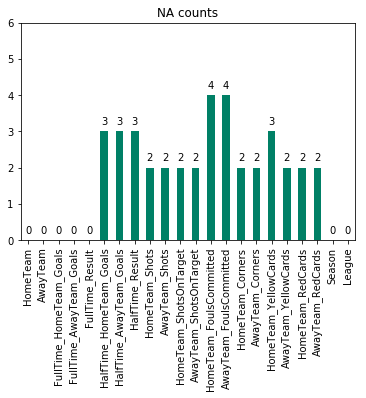

In [166]:
plt.cla()
plt.clf()
missing_data = data.isnull().sum()
ax = missing_data.plot(kind = 'bar', colormap='summer')
ax.set_ylim(0, 6)
plt.title("NA counts")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

So we have a few rows with null values for certain columns

Lets try populating the null values now

We can assume that Half Time Results/Goals were in line with Full Time results/goals whenever Half Time data is empty

In [167]:
data['HalfTime_Result'] = data.apply(
    lambda row: row['FullTime_Result'] if pd.isnull(row['HalfTime_Result']) else row['HalfTime_Result'],
    axis=1
)
data['HalfTime_HomeTeam_Goals'] = data.apply(
    lambda row: row['FullTime_HomeTeam_Goals'] if pd.isnull(row['HalfTime_HomeTeam_Goals']) else row['HalfTime_HomeTeam_Goals'],
    axis=1
)
data['HalfTime_AwayTeam_Goals'] = data.apply(
    lambda row: row['FullTime_AwayTeam_Goals'] if pd.isnull(row['HalfTime_AwayTeam_Goals']) else row['HalfTime_AwayTeam_Goals'],
    axis=1
)

When data is missing we can assume that total no of shots/shots on target is same as the number of goals

In [168]:
data['HomeTeam_Shots'] = data.apply(
    lambda row: row['FullTime_HomeTeam_Goals'] if pd.isnull(row['HomeTeam_Shots']) else row['HomeTeam_Shots'],
    axis=1
)
data['HomeTeam_ShotsOnTarget'] = data.apply(
    lambda row: row['FullTime_HomeTeam_Goals'] if pd.isnull(row['HomeTeam_ShotsOnTarget']) else row['HomeTeam_ShotsOnTarget'],
    axis=1
)
data['AwayTeam_Shots'] = data.apply(
    lambda row: row['FullTime_AwayTeam_Goals'] if pd.isnull(row['AwayTeam_Shots']) else row['AwayTeam_Shots'],
    axis=1
)
data['AwayTeam_ShotsOnTarget'] = data.apply(
    lambda row: row['FullTime_AwayTeam_Goals'] if pd.isnull(row['AwayTeam_ShotsOnTarget']) else row['AwayTeam_ShotsOnTarget'],
    axis=1
)

Fouls committed, corners and red/yellow cards missing data can be populated based on average number of fouls committed/red or yellow cards in other matches involving these teams

In [169]:
fouls_missing = data[(data['HomeTeam_FoulsCommitted'].isnull()) | (data['AwayTeam_FoulsCommitted'].isnull())]
display(HTML(fouls_missing.to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
23/09/12,Cagliari,Roma,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-2013,SerieA
18/09/11,Lyon,Marseille,2,0,H,2.0,0.0,H,10.0,6.0,5.0,3.0,NaN,NaN,3.0,5.0,0.0,3.0,0.0,0.0,2011-2012,Ligue1
17/12/11,Caen,Nancy,1,2,A,0.0,1.0,A,9.0,9.0,1.0,3.0,NaN,NaN,8.0,1.0,2.0,5.0,0.0,0.0,2011-2012,Ligue1
16/04/17,Bastia,Lyon,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017,Ligue1


In [170]:
avg_foul_data = data.groupby(['HomeTeam','AwayTeam'])['HomeTeam_FoulsCommitted','AwayTeam_FoulsCommitted'].mean()

In [171]:
is_cagliary_vs_roma = ((data['HomeTeam']=='Cagliari') & (data['AwayTeam']=='Roma')) 

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Cagliari','Roma')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Cagliari','Roma')]['AwayTeam_FoulsCommitted']

In [172]:
is_lyon_vs_marseille = ((data['HomeTeam']=='Lyon') & (data['AwayTeam']=='Marseille'))

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_lyon_vs_marseille),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Lyon','Marseille')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_lyon_vs_marseille),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Lyon','Marseille')]['AwayTeam_FoulsCommitted']

In [173]:
is_caen_vs_nancy = ((data['HomeTeam']=='Caen') & (data['AwayTeam']=='Nancy'))

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_caen_vs_nancy),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Caen','Nancy')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_caen_vs_nancy),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Caen','Nancy')]['AwayTeam_FoulsCommitted']

In [174]:
is_bastia_vs_lyon = ((data['HomeTeam']=='Bastia') & (data['AwayTeam']=='Lyon'))

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Bastia','Lyon')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Bastia','Lyon')]['AwayTeam_FoulsCommitted']

In [175]:
cards_missing = data[(data['HomeTeam_YellowCards'].isnull()) | (data['AwayTeam_YellowCards'].isnull()) | (data['HomeTeam_RedCards'].isnull()) | (data['AwayTeam_RedCards'].isnull())]
display(HTML(cards_missing.to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
23/09/12,Cagliari,Roma,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.833333,11.666667,NaN,NaN,NaN,NaN,NaN,NaN,2012-2013,SerieA
02/03/15,Roma,Juventus,1,1,D,0.0,0.0,D,8.0,10.0,3.0,1.0,11.000000,16.000000,1.0,5.0,NaN,5.0,1.0,0.0,2014-2015,SerieA
16/04/17,Bastia,Lyon,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.250000,14.750000,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017,Ligue1


In [176]:
avg_card_data = data.groupby(['HomeTeam','AwayTeam'])['HomeTeam_YellowCards','HomeTeam_RedCards','AwayTeam_YellowCards','AwayTeam_RedCards'].mean()

In [177]:
is_cagliary_vs_roma = ((data['HomeTeam']=='Cagliari') & (data['AwayTeam']=='Roma')) 

data.loc[(data['HomeTeam_YellowCards'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_YellowCards']=avg_card_data.loc[('Cagliari','Roma')]['HomeTeam_YellowCards']
data.loc[(data['HomeTeam_RedCards'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_RedCards']=avg_card_data.loc[('Cagliari','Roma')]['HomeTeam_RedCards']

data.loc[(data['AwayTeam_YellowCards'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_YellowCards']=avg_card_data.loc[('Cagliari','Roma')]['AwayTeam_YellowCards']
data.loc[(data['AwayTeam_RedCards'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_RedCards']=avg_card_data.loc[('Cagliari','Roma')]['AwayTeam_RedCards']

In [178]:
is_roma_vs_juventus = ((data['HomeTeam']=='Roma') & (data['AwayTeam']=='Juventus')) 

data.loc[(data['HomeTeam_YellowCards'].isnull()) & (is_roma_vs_juventus),'HomeTeam_YellowCards']=avg_card_data.loc[('Roma','Juventus')]['HomeTeam_YellowCards']
data.loc[(data['HomeTeam_RedCards'].isnull()) & (is_roma_vs_juventus),'HomeTeam_RedCards']=avg_card_data.loc[('Roma','Juventus')]['HomeTeam_RedCards']

data.loc[(data['AwayTeam_YellowCards'].isnull()) & (is_roma_vs_juventus),'AwayTeam_YellowCards']=avg_card_data.loc[('Roma','Juventus')]['AwayTeam_YellowCards']
data.loc[(data['AwayTeam_RedCards'].isnull()) & (is_roma_vs_juventus),'AwayTeam_RedCards']=avg_card_data.loc[('Roma','Juventus')]['AwayTeam_RedCards']

In [179]:
is_bastia_vs_lyon = ((data['HomeTeam']=='Bastia') & (data['AwayTeam']=='Lyon')) 

data.loc[(data['HomeTeam_YellowCards'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_YellowCards']=avg_card_data.loc[('Bastia','Lyon')]['HomeTeam_YellowCards']
data.loc[(data['HomeTeam_RedCards'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_RedCards']=avg_card_data.loc[('Bastia','Lyon')]['HomeTeam_RedCards']

data.loc[(data['AwayTeam_YellowCards'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_YellowCards']=avg_card_data.loc[('Bastia','Lyon')]['AwayTeam_YellowCards']
data.loc[(data['AwayTeam_RedCards'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_RedCards']=avg_card_data.loc[('Bastia','Lyon')]['AwayTeam_RedCards']

In [180]:
corners_missing = data[(data['HomeTeam_Corners'].isnull()) | (data['AwayTeam_Corners'].isnull())  ]
display(HTML(corners_missing.to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
23/09/12,Cagliari,Roma,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.833333,11.666667,NaN,NaN,2.666667,2.333333,0.0,0.166667,2012-2013,SerieA
16/04/17,Bastia,Lyon,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.250000,14.750000,NaN,NaN,2.500000,1.250000,0.5,0.000000,2016-2017,Ligue1


In [181]:
avg_corner_data = data.groupby(['HomeTeam','AwayTeam'])['HomeTeam_Corners','AwayTeam_Corners'].mean()

In [182]:
is_cagliary_vs_roma = ((data['HomeTeam']=='Cagliari') & (data['AwayTeam']=='Roma')) 

data.loc[(data['HomeTeam_Corners'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['HomeTeam_Corners']
data.loc[(data['AwayTeam_Corners'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['AwayTeam_Corners']

In [183]:
is_bastia_vs_lyon = ((data['HomeTeam']=='Bastia') & (data['AwayTeam']=='Lyon')) 

data.loc[(data['HomeTeam_Corners'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['HomeTeam_Corners']
data.loc[(data['AwayTeam_Corners'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['AwayTeam_Corners']

Now there should not be any row/column with null values

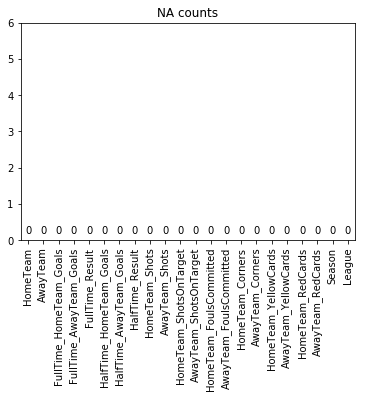

In [184]:
plt.cla()
plt.clf()
missing_data = data.isnull().sum()
ax = missing_data.plot(kind = 'bar', colormap='summer')
ax.set_ylim(0, 6)
plt.title("NA counts")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

As expected, there are no null values now. All the null values have been cleaned up

## Feature Engineering

Now lets add the following extra columns :
1. Winner : if FullTime_Result = 'H', then its Home Team. if FullTime_Result = 'A', then its Away Team. Elese its null (implying draw)
2. Goal Difference (Home Team) : Full Time Home Team Goals - Full Time Away Team Goals
3. Goal Difference (Away Team) : Full Time Away Team Goals - Full Time Home Team Goals
4. Total Cards (Home Team) : Home Team Yellow Cards + Home Team Red Cards
5. Total Cards (Away Team) : Away Team Yellow Cards + Away Team Red Cards
6. Percentage of Shots on Target (Home team): Home team shots on Target/Home team shots
7. Percentage of Shots on Target (Away team): Away team shots on Target/Away team shots
8. Home Team Goal saves = Away team shots on target - Full Time Away Team Goals
9. Away Team Goal saves = Home team shots on target - Full Time Home Team Goals
10. Total Goals = Full Time Home Team Goals + Full Time Away Team Goals
11. Total Cards = Total Cards (Home Team) + Total Cards(Away Team)

In [185]:
data['Winner']=np.NaN
data['Winner'] = data.apply(
    lambda row: row['HomeTeam'] if row['FullTime_Result']=='H' else row['AwayTeam'] if row['FullTime_Result']=='A' else np.NaN,
    axis=1
)

In [186]:
data['HomeTeam_GoalDiff'] = data['FullTime_HomeTeam_Goals']-data['FullTime_AwayTeam_Goals']
data['AwayTeam_GoalDiff'] = data['FullTime_AwayTeam_Goals']-data['FullTime_HomeTeam_Goals']
data['TotalGoals']= data['FullTime_HomeTeam_Goals'] + data['FullTime_AwayTeam_Goals']

In [187]:
data['HomeTeam_TotalCards'] = data['HomeTeam_YellowCards'] + data['HomeTeam_RedCards']
data['AwayTeam_TotalCards'] = data['AwayTeam_YellowCards'] + data['AwayTeam_RedCards']
data['TotalCards']=data['HomeTeam_TotalCards'] + data['AwayTeam_TotalCards']

In [188]:
data['HomeTeam_ShotsOnTarget_Percent'] = data['HomeTeam_ShotsOnTarget']*100/data['HomeTeam_Shots']
data['AwayTeam_ShotsOnTarget_Percent'] = data['AwayTeam_ShotsOnTarget']*100/data['AwayTeam_Shots']

In [189]:
data['HomeTeam_GoalSaves'] = data['AwayTeam_ShotsOnTarget'] - data['FullTime_AwayTeam_Goals']
data['AwayTeam_GoalSaves'] = data['HomeTeam_ShotsOnTarget'] - data['FullTime_HomeTeam_Goals']

In [190]:
display(HTML(data.head().to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League,Winner,HomeTeam_GoalDiff,AwayTeam_GoalDiff,TotalGoals,HomeTeam_TotalCards,AwayTeam_TotalCards,TotalCards,HomeTeam_ShotsOnTarget_Percent,AwayTeam_ShotsOnTarget_Percent,HomeTeam_GoalSaves,AwayTeam_GoalSaves
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-14,Aston Villa,West Ham,3,0,H,2.0,0.0,H,23.0,12.0,11.0,2.0,15.0,15.0,16.0,7.0,1.0,2.0,0.0,0.0,2010-2011,EPL,Aston Villa,3,-3,3,1.0,2.0,3.0,47.826087,16.666667,2.0,8.0
2010-08-14,Blackburn,Everton,1,0,H,1.0,0.0,H,7.0,17.0,2.0,12.0,19.0,14.0,1.0,3.0,2.0,1.0,0.0,0.0,2010-2011,EPL,Blackburn,1,-1,1,2.0,1.0,3.0,28.571429,70.588235,12.0,1.0
2010-08-14,Bolton,Fulham,0,0,D,0.0,0.0,D,13.0,12.0,9.0,7.0,12.0,13.0,4.0,8.0,1.0,3.0,0.0,0.0,2010-2011,EPL,NaN,0,0,0,1.0,3.0,4.0,69.230769,58.333333,7.0,9.0
2010-08-14,Chelsea,West Brom,6,0,H,2.0,0.0,H,18.0,10.0,13.0,4.0,10.0,10.0,3.0,1.0,1.0,0.0,0.0,0.0,2010-2011,EPL,Chelsea,6,-6,6,1.0,0.0,1.0,72.222222,40.000000,4.0,7.0
2010-08-14,Sunderland,Birmingham,2,2,D,1.0,0.0,H,6.0,13.0,2.0,7.0,13.0,10.0,3.0,6.0,3.0,3.0,1.0,0.0,2010-2011,EPL,NaN,0,0,4,4.0,3.0,7.0,33.333333,53.846154,5.0,0.0


## Feature Analysis

So finaly we have the following features for analysis

In [191]:
for c in data.columns :
    print(c)

HomeTeam
AwayTeam
FullTime_HomeTeam_Goals
FullTime_AwayTeam_Goals
FullTime_Result
HalfTime_HomeTeam_Goals
HalfTime_AwayTeam_Goals
HalfTime_Result
HomeTeam_Shots
AwayTeam_Shots
HomeTeam_ShotsOnTarget
AwayTeam_ShotsOnTarget
HomeTeam_FoulsCommitted
AwayTeam_FoulsCommitted
HomeTeam_Corners
AwayTeam_Corners
HomeTeam_YellowCards
AwayTeam_YellowCards
HomeTeam_RedCards
AwayTeam_RedCards
Season
League
Winner
HomeTeam_GoalDiff
AwayTeam_GoalDiff
TotalGoals
HomeTeam_TotalCards
AwayTeam_TotalCards
TotalCards
HomeTeam_ShotsOnTarget_Percent
AwayTeam_ShotsOnTarget_Percent
HomeTeam_GoalSaves
AwayTeam_GoalSaves


<b>a) Home Team/Away Team :</b> Contains the name of the home team/away team for a particular game

In [192]:
#The count of unique values for both of these columns must be same
print(len(data['HomeTeam'].unique()))
print(len(data['AwayTeam'].unique()))

163
163


Let's look at the total number of teams per league as well as the average number of teams per season

<Figure size 432x288 with 0 Axes>

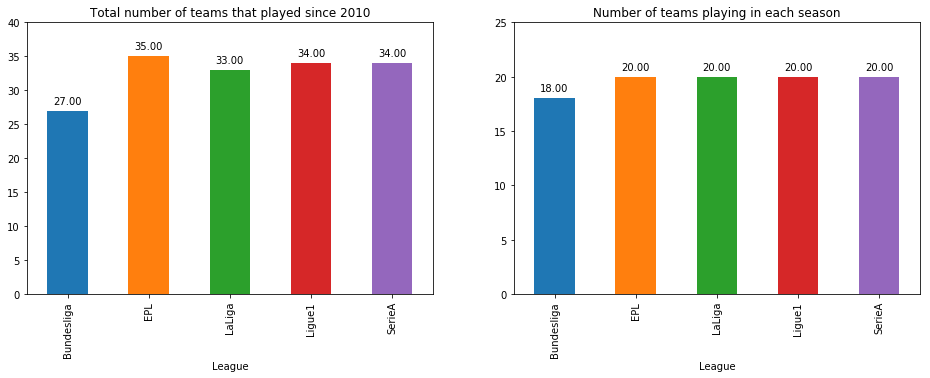

In [193]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))
ax0 = data.groupby('League').HomeTeam.nunique().plot(kind = 'bar', ax=axes[0])
ax0.set_ylim(0, 40) 
ax0.set_title('Total number of teams that played since 2010')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

data2017_18 = data[data['Season']=='2017-2018'] # any year should have been fine
ax1 = data2017_18.groupby('League').HomeTeam.nunique().plot(kind = 'bar', ax=axes[1])
ax1.set_ylim(0, 25) 
ax1.set_title('Number of teams playing in each season')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()


The difference the the two numbers indicates that teams were relegated to lower tier league or top teams from lower tier leagues were promoted

Let's look at the number of seasons each team featured in the league :

A. Bundesliga:
    

<Figure size 432x288 with 0 Axes>

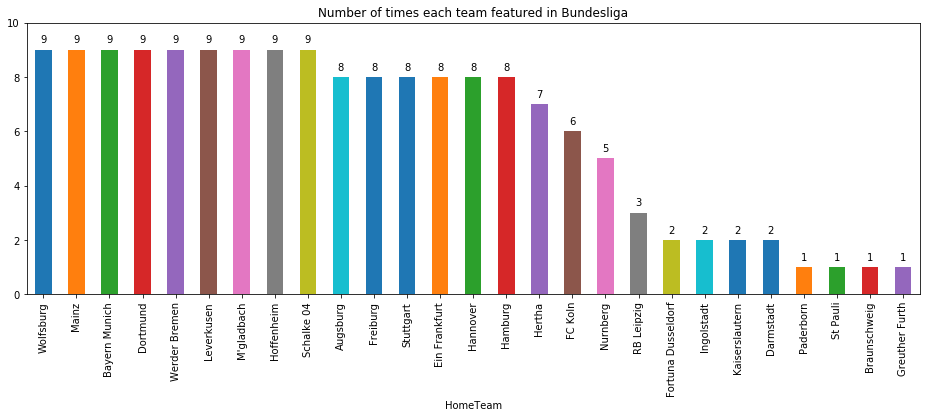

In [194]:
bundesliga = data[data['League']=='Bundesliga'][['HomeTeam','Season']]
bundesliga = bundesliga.groupby('HomeTeam').Season.nunique()
bundesliga.sort_values(inplace=True, ascending=False)

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = bundesliga.plot(kind='bar')
ax.set_ylim(0, 10) 
ax.set_title('Number of times each team featured in Bundesliga')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly the teams that have never been relegated from Bundesliga are :
    1. Wolfsburg
    2. Mainz
    3. Bayern Munich
    4. Dortmund
    5. Werder Bremen
    6. Leverkusen
    7. M'gladbach
    8. Hoffenheim
    9. Schalke04
Rest of the teams have been relegated at least once

9 out of 18 or 50 % of teams have remained consistent across last 9 seasons of Bundesliga

B. EPL

<Figure size 432x288 with 0 Axes>

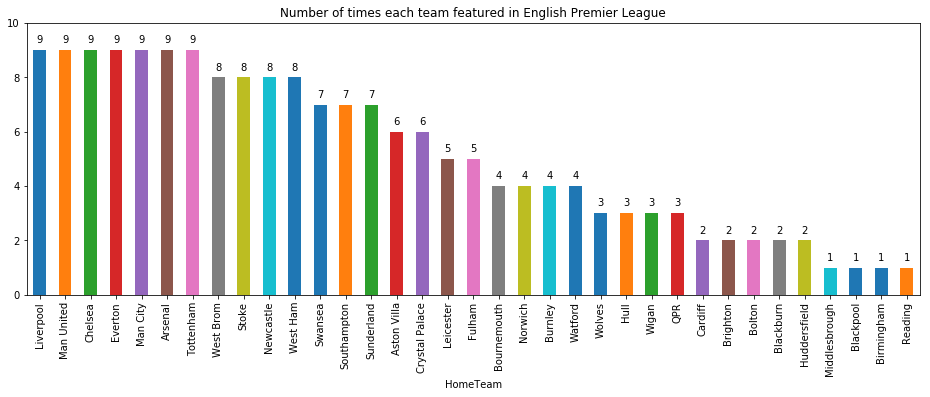

In [195]:
epl = data[data['League']=='EPL'][['HomeTeam','Season']]
epl = epl.groupby('HomeTeam').Season.nunique()
epl.sort_values(inplace=True, ascending=False)

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = epl.plot(kind='bar')
ax.set_ylim(0, 10) 
ax.set_title('Number of times each team featured in English Premier League')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly the teams that have never been relegated from EPL are :
    1. Liverpool
    2. Man United
    3. Chelsea
    4. Everton
    5. Man City
    6. Arsenal
    7. Tottenhum
Rest of the teams have been relegated at least once

7 out of 20 or 35 % of teams have remained consistent across last 9 seasons of EPL

C. La Liga

<Figure size 432x288 with 0 Axes>

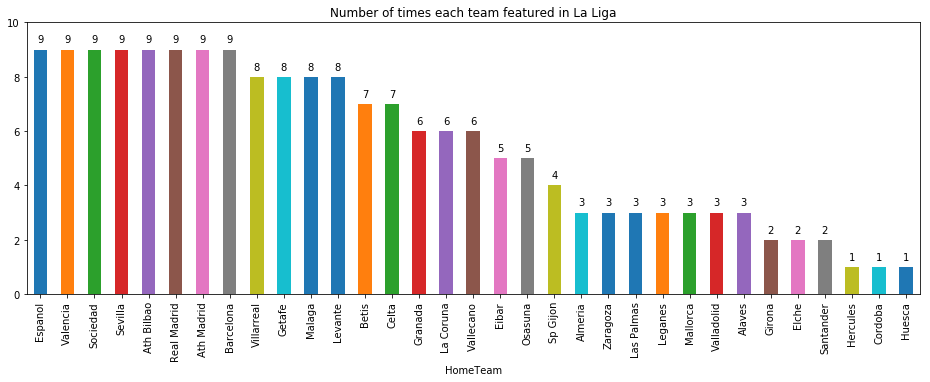

In [196]:
laliga = data[data['League']=='LaLiga'][['HomeTeam','Season']]
laliga = laliga.groupby('HomeTeam').Season.nunique()
laliga.sort_values(inplace=True, ascending=False)

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = laliga.plot(kind='bar')
ax.set_ylim(0, 10) 
ax.set_title('Number of times each team featured in La Liga')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly the teams that have never been relegated from LaLiga are :

1. Espanol
2. Valencia
3. Sociedad
4. Sevilla
5. Ath Bilbao
6. Real Madrid
7. Ath Madrid
8. Barcelona
Rest of the teams have been relegated at least once

8 out of 20 or 40 % of teams have remained consistent across last 9 seasons of La Liga

D. Serie A

<Figure size 432x288 with 0 Axes>

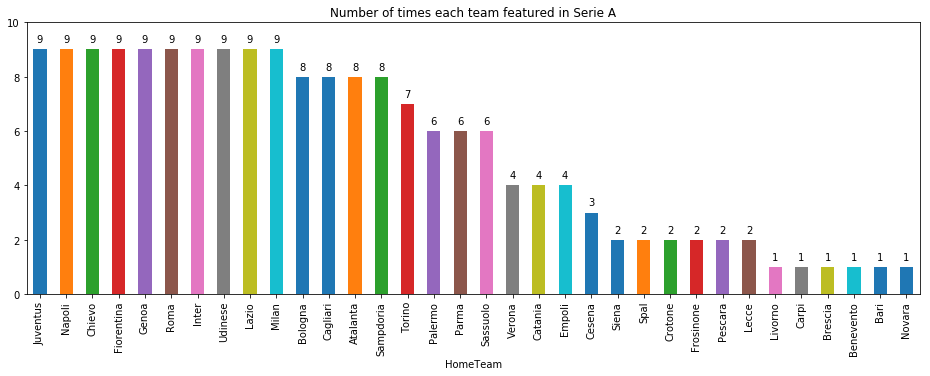

In [197]:
serieA = data[data['League']=='SerieA'][['HomeTeam','Season']]
serieA = serieA.groupby('HomeTeam').Season.nunique()
serieA.sort_values(inplace=True, ascending=False)

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = serieA.plot(kind='bar')
ax.set_ylim(0, 10) 
ax.set_title('Number of times each team featured in Serie A')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly the teams that have never been relegated from Serie A are :

1. Juventus<br>
2. Napoli<br>
3. Chievo<br>
4. Florentina<br>
5. Genoa<br>
6. Roma<br>
7. Inter Milan<br>
8. Udinese<br>
9. Lazio<br>
10. AC Milan<br>
Rest of the teams have been relegated at least once<br>
10 out of 20 or 50 % of teams have remained consistent across last 9 seasons of Serie A

E. Ligue 1

<Figure size 432x288 with 0 Axes>

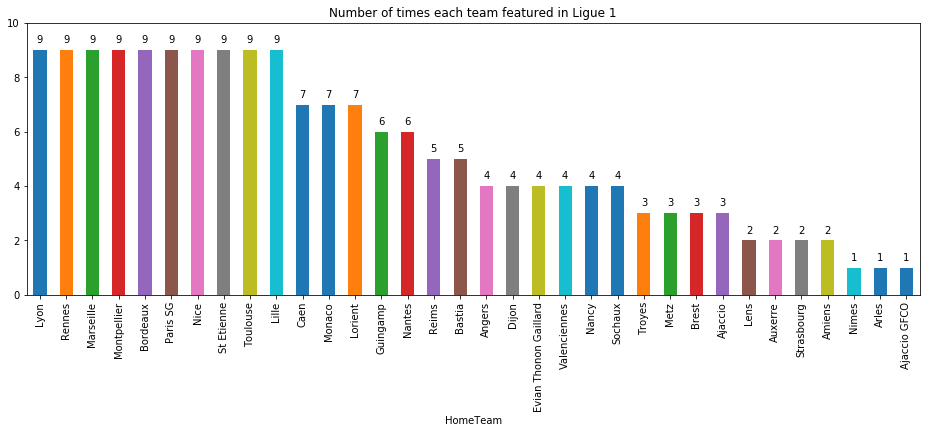

In [198]:
ligue1 = data[data['League']=='Ligue1'][['HomeTeam','Season']]
ligue1 = ligue1.groupby('HomeTeam').Season.nunique()
ligue1.sort_values(inplace=True, ascending=False)

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = ligue1.plot(kind='bar')
ax.set_ylim(0, 10) 
ax.set_title('Number of times each team featured in Ligue 1')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly the teams that have never been relegated from Ligue 1 are :

1. Lyon<br>
2. Rennes<br>
3. Marseille<br>
4. Montpellier<br>
5. Bordeaux<br>
6. Paris SG<br>
7. Nice<br>
8. St Etienne<br>
9. Toulouse<br>
10. Lille<br>
Rest of the teams have been relegated at least once<br>
10 out of 20 or 50 % of teams have remained consistent across last 9 seasons of Serie A

In terms of relegation, EPL has been the most volatile league over past 9 years. Only 35 % teams have been consistent. For other leagues, the percentage varies from 40 to 50 %

<b>b. Full time Home/Away Team Goals/Total Goals :</b> Indicates the number of goals scored by Home/Away team at the end of the match

In [199]:
grouped_by_leagues = data.groupby('League').agg('mean')
grouped_by_seasons = data.groupby('Season').agg('mean')

<Figure size 432x288 with 0 Axes>

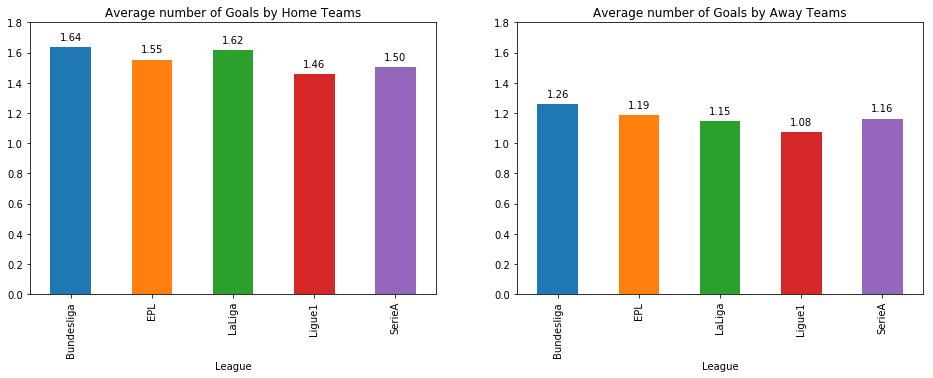

In [200]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_leagues['FullTime_HomeTeam_Goals'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 1.8) 
ax0.set_title('Average number of Goals by Home Teams')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_leagues['FullTime_AwayTeam_Goals'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 1.8) 
ax1.set_title('Average number of Goals by Away Teams')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Clearly in every league there's a significant home advantage

<Figure size 432x288 with 0 Axes>

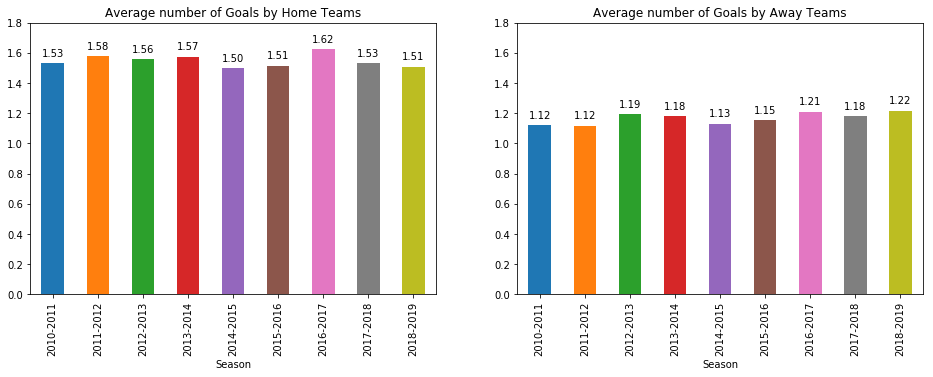

In [201]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_seasons['FullTime_HomeTeam_Goals'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 1.8) 
ax0.set_title('Average number of Goals by Home Teams')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_seasons['FullTime_AwayTeam_Goals'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 1.8) 
ax1.set_title('Average number of Goals by Away Teams')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In last 10 years, across all leagues, away teams have improved (but only marginally) - from 1.12 goals per match to 1.22 goals per match

Lets look at the total number of goals as well. Let’s find out which league had the most goals. 

<Figure size 432x288 with 0 Axes>

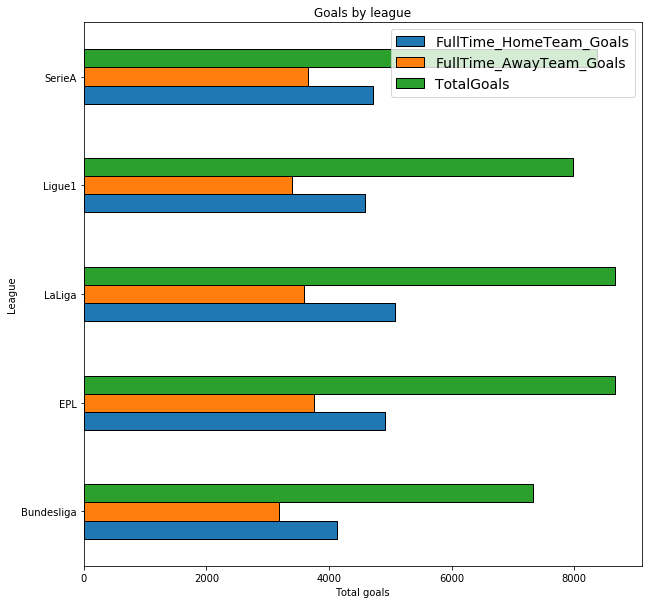

In [249]:
plt.cla()
plt.clf()
data.groupby("League").agg({"FullTime_HomeTeam_Goals":"sum","FullTime_AwayTeam_Goals":"sum","TotalGoals":"sum"}).plot(kind="barh" ,figsize = (10,10),edgecolor = "k",linewidth =1)
plt.title("Goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total goals")
plt.show()

Clearly EPL and La Liga produces more goals as compared to other leagues

Lets look at the season-wise data as well.

<Figure size 432x288 with 0 Axes>

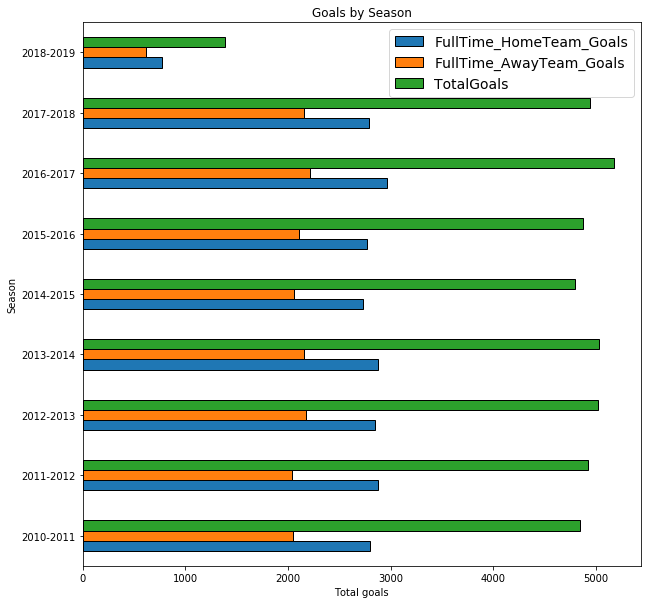

In [251]:
plt.cla()
plt.clf()
data.groupby("Season").agg({"FullTime_HomeTeam_Goals":"sum","FullTime_AwayTeam_Goals":"sum","TotalGoals":"sum"}).plot(kind="barh" ,figsize = (10,10),edgecolor = "k",linewidth =1)
plt.title("Goals by Season")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total goals")
plt.show()

From 2010-11 to 2013-14, number of goals increased each season but stopped growing after 2013-14 season

<b> c. Full Time Result :</b> Indicates whether Home or Away team won or if the match ended in a draw

In [202]:
result_dict = {'A':'Away Team Won','H':'Home Team Won','D': 'Draw'}

<Figure size 432x288 with 0 Axes>

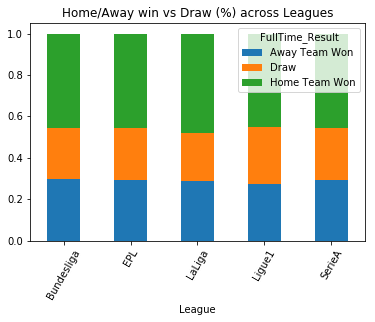

In [203]:
plt.cla()
plt.clf()
pd.crosstab(data['League'], data['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="Home/Away win vs Draw (%) across Leagues", rot=60)
plt.show() 

Home Team wins more than 40 % of matches in every league.

Home Advantage seems to be a bigger factor in La Liga as compared to other leagues

Ligue1 produces more draws than other leagues

Lets look at how the data changed over the years

<Figure size 432x288 with 0 Axes>

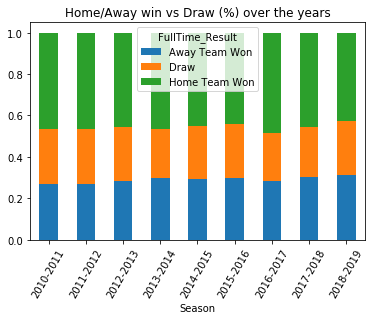

In [204]:
plt.cla()
plt.clf()
pd.crosstab(data['Season'], data['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="Home/Away win vs Draw (%) over the years", rot=60)
plt.show()

There hasnt been any drastic change over the years - Home advantage has always been significant. Away performance have improved but only marginally

In [205]:
epl = data[data['League']=='EPL']
laliga = data[data['League']=='LaLiga']
serieA = data[data['League']=='SerieA']
ligue1 = data[data['League']=='Ligue1']
bundesliga = data[data['League']=='Bundesliga']

<Figure size 432x288 with 0 Axes>

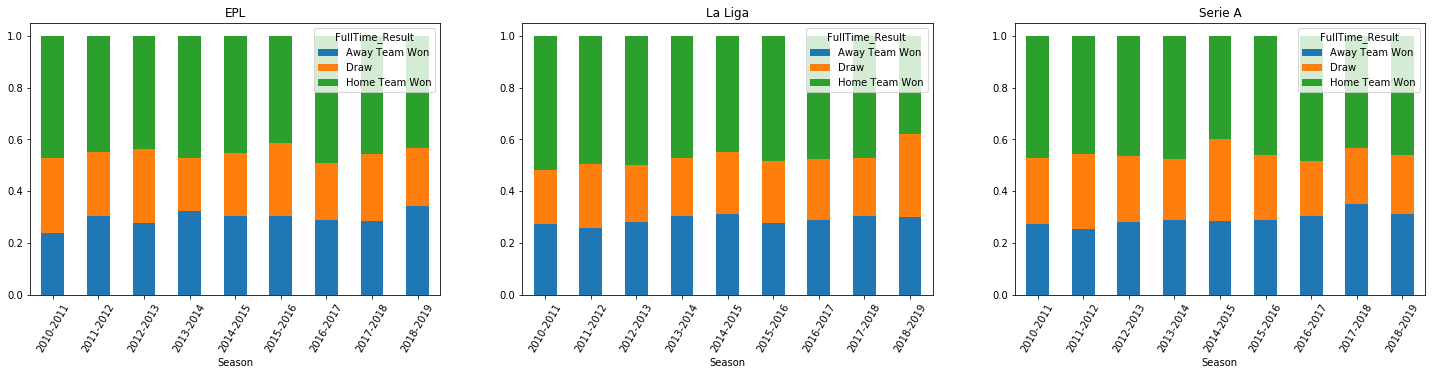

In [206]:
plt.cla()
plt.clf()
fig, axes = plt.subplots(1,3, figsize=(25, 5))
pd.crosstab(epl['Season'], epl['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="EPL", rot=60, ax=axes[0])
pd.crosstab(laliga['Season'], laliga['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="La Liga", rot=60, ax=axes[1])
pd.crosstab(serieA['Season'], serieA['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="Serie A", rot=60, ax=axes[2])
plt.show()

<Figure size 432x288 with 0 Axes>

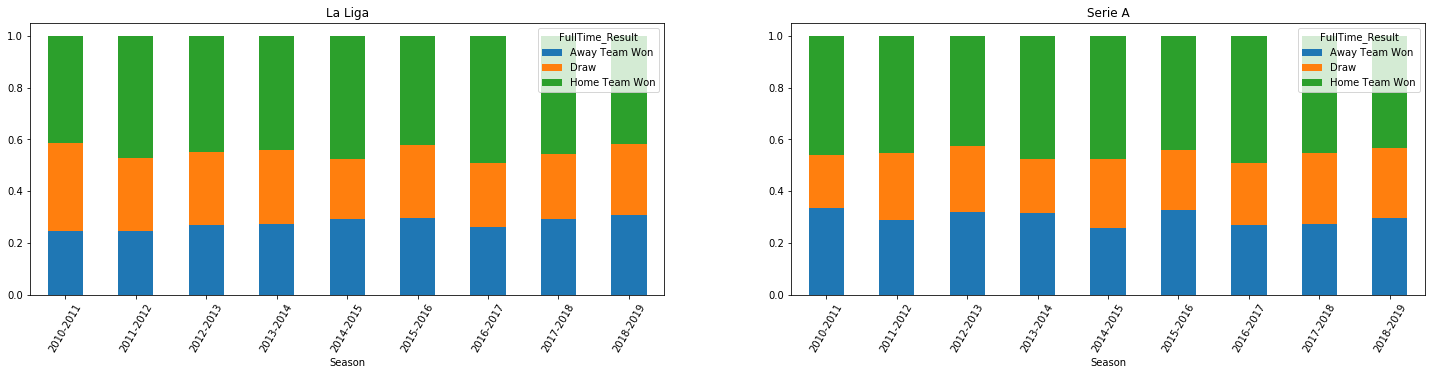

In [207]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1,2, figsize=(25, 5))
pd.crosstab(ligue1['Season'], ligue1['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="La Liga", rot=60, ax= axes[0])
pd.crosstab(bundesliga['Season'], bundesliga['FullTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="Serie A", rot=60, ax=axes[1])
plt.show()

There is no league specific trend that emerged over the years. Home Advantage continues to be significant

<b> d. Half Time Home/Away team goals : </b> Indicates the number of Goals scored by Home/Away team at Half Time

<Figure size 432x288 with 0 Axes>

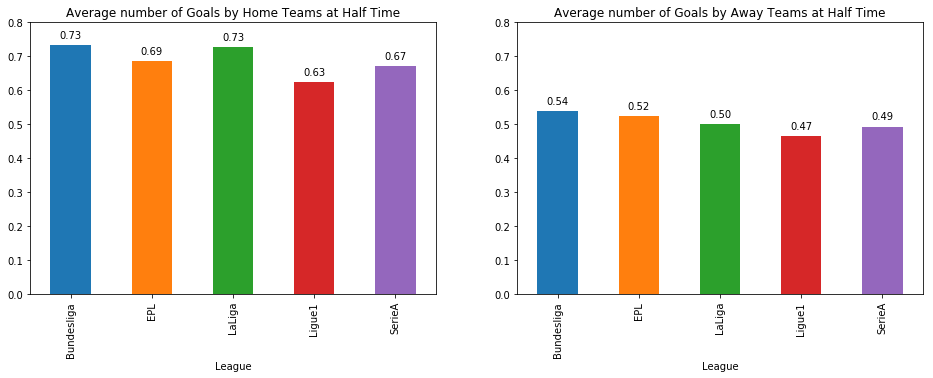

In [208]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_leagues['HalfTime_HomeTeam_Goals'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 0.8) 
ax0.set_title('Average number of Goals by Home Teams at Half Time')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_leagues['HalfTime_AwayTeam_Goals'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 0.8) 
ax1.set_title('Average number of Goals by Away Teams at Half Time')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

So Home Team typically dominates first half of the match as well

If we look at the corresponding full time goal numbers :

<Figure size 432x288 with 0 Axes>

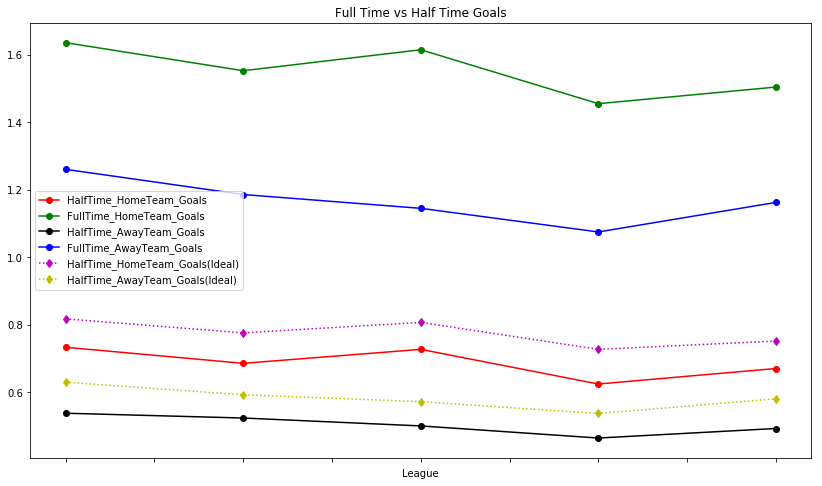

In [209]:
plt.cla()
plt.clf()

grouped_by_leagues['HalfTime_HomeTeam_Goals(Ideal)']=grouped_by_leagues['FullTime_HomeTeam_Goals']/2
grouped_by_leagues['HalfTime_AwayTeam_Goals(Ideal)']=grouped_by_leagues['FullTime_AwayTeam_Goals']/2

fig, ax = plt.subplots(figsize=(14, 8))
grouped_by_leagues[['HalfTime_HomeTeam_Goals','FullTime_HomeTeam_Goals','HalfTime_AwayTeam_Goals','FullTime_AwayTeam_Goals']].plot(ax=ax, color=['r', 'g', 'k', 'b'], marker="o")
grouped_by_leagues[['HalfTime_HomeTeam_Goals(Ideal)','HalfTime_AwayTeam_Goals(Ideal)']].plot(ax=ax, color=[ 'm','y'], marker="d", linestyle=":")
plt.legend()
plt.title("Full Time vs Half Time Goals")
plt.show()

For Both Home and Away teams, Half Time goals is significantly less than full time goals/2

So both Home and Away teams are typically more aggressive and attack more during second half of the match

<Figure size 432x288 with 0 Axes>

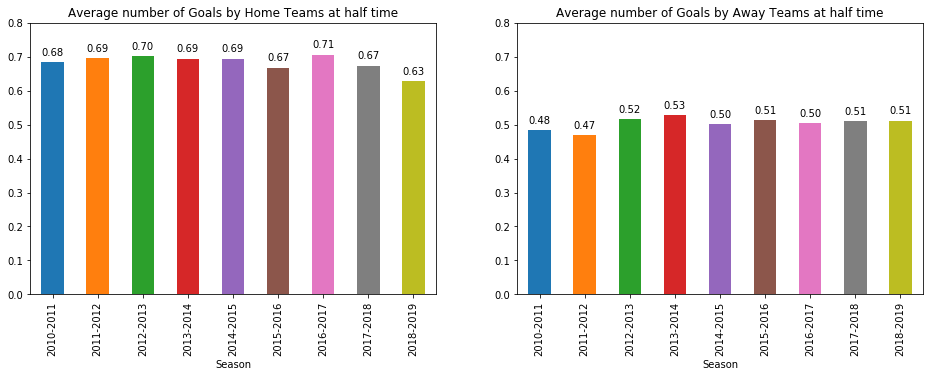

In [210]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_seasons['HalfTime_HomeTeam_Goals'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 0.8) 
ax0.set_title('Average number of Goals by Home Teams at half time')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_seasons['HalfTime_AwayTeam_Goals'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 0.8) 
ax1.set_title('Average number of Goals by Away Teams at half time')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Data pattern remains almost uniform across years

<Figure size 432x288 with 0 Axes>

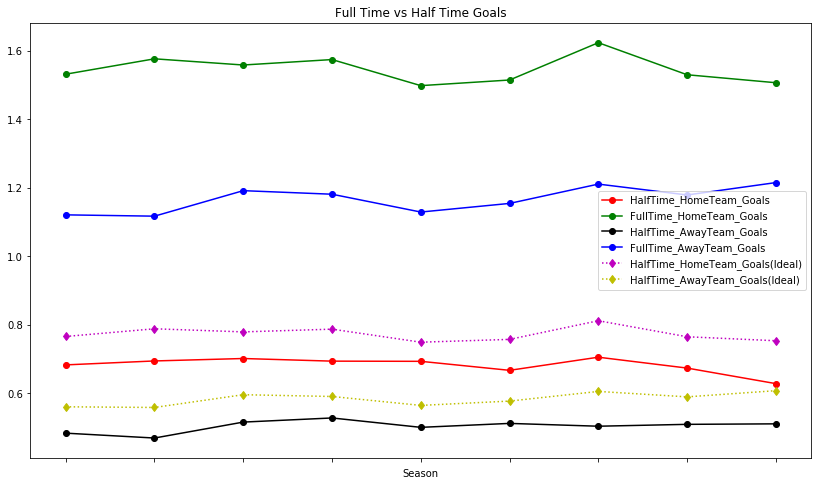

In [211]:
plt.cla()
plt.clf()
grouped_by_seasons['HalfTime_HomeTeam_Goals(Ideal)']=grouped_by_seasons['FullTime_HomeTeam_Goals']/2
grouped_by_seasons['HalfTime_AwayTeam_Goals(Ideal)']=grouped_by_seasons['FullTime_AwayTeam_Goals']/2

fig, ax = plt.subplots(figsize=(14, 8))
grouped_by_seasons[['HalfTime_HomeTeam_Goals','FullTime_HomeTeam_Goals','HalfTime_AwayTeam_Goals','FullTime_AwayTeam_Goals']].plot(ax=ax, color=['r', 'g', 'k', 'b'], marker="o")
grouped_by_seasons[['HalfTime_HomeTeam_Goals(Ideal)','HalfTime_AwayTeam_Goals(Ideal)']].plot(ax=ax, color=[ 'm','y'], marker="d", linestyle=":")
plt.legend()
plt.title("Full Time vs Half Time Goals")
plt.show()


Over the years, both home and away teams have remained defensive during first half and more aggressive during second half

<b> e. Half Time Result :</b> Indicates whether Home or Away team was ahead at half time (or  if both teams were tied at equal no of goals)

In [212]:
result_dict = {'A':'Away Team Ahead','H':'Home Team Ahead','D': 'Both teams tied'}

<Figure size 432x288 with 0 Axes>

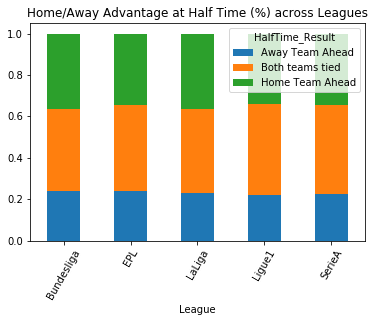

In [213]:
plt.cla()
plt.clf()
pd.crosstab(data['League'], data['HalfTime_Result'].map(result_dict), normalize='index').plot(kind='bar', stacked=True, title="Home/Away Advantage at Half Time (%) across Leagues", rot=60)
plt.show()

Home Team is ahead at half time in nearly 40 % of matches in every league. So home team dominates right from beginning

Lets look at the half time and full time together

In [214]:
df1 = pd.crosstab(data['League'], data['HalfTime_Result'], normalize='index')
df2 = pd.crosstab(data['League'], data['FullTime_Result'], normalize='index')

display(HTML(df1.to_html()))
display(HTML(df2.to_html()))

HalfTime_Result,A,D,H
League,,,
Bundesliga,0.237248,0.398577,0.364176
EPL,0.239557,0.417722,0.342722
LaLiga,0.228662,0.404777,0.366561
Ligue1,0.220952,0.438095,0.340952
SerieA,0.222930,0.431210,0.345860


FullTime_Result,A,D,H
League,,,
Bundesliga,0.298142,0.243575,0.458284
EPL,0.292405,0.253165,0.454430
LaLiga,0.287261,0.233439,0.479299
Ligue1,0.273016,0.276190,0.450794
SerieA,0.291083,0.253185,0.455732


<Figure size 432x288 with 0 Axes>

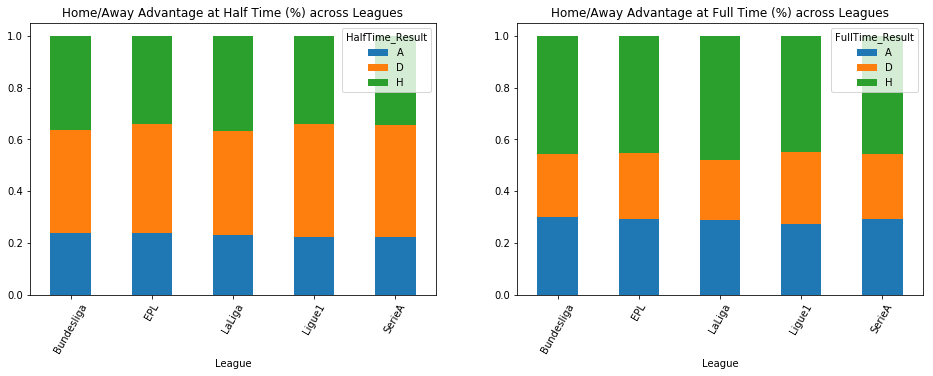

In [215]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))
df1.plot(kind='bar', stacked=True, title="Home/Away Advantage at Half Time (%) across Leagues", rot=60, ax = axes[0])
df2.plot(kind='bar', stacked=True, title="Home/Away Advantage at Full Time (%) across Leagues", rot=60, ax = axes[1])
plt.show()

From the data the following points are clear :
1. Teams are more aggressive in second half and push for a result. Nearly 40 % of matches are tied at half time while only 23-26 % matches are tied at full time
2. Home Advantage is stronger in second half than in the first half

Lets look at how the data changed over the years

In [216]:
df1 = pd.crosstab(data['Season'], data['HalfTime_Result'], normalize='index')
df2 = pd.crosstab(data['Season'], data['FullTime_Result'], normalize='index')

display(HTML(df1.to_html()))
display(HTML(df2.to_html()))

HalfTime_Result,A,D,H
Season,,,
2010-2011,0.224535,0.415663,0.359803
2011-2012,0.215772,0.427163,0.357065
2012-2013,0.223987,0.419496,0.356517
2013-2014,0.246988,0.403067,0.349945
2014-2015,0.216867,0.429901,0.353231
2015-2016,0.241512,0.422234,0.336254
2016-2017,0.225082,0.416210,0.358708
2017-2018,0.237130,0.416210,0.346659
2018-2019,0.246575,0.422701,0.330724


FullTime_Result,A,D,H
Season,,,
2010-2011,0.269989,0.262870,0.467141
2011-2012,0.268894,0.265608,0.465498
2012-2013,0.284775,0.259584,0.455641
2013-2014,0.300110,0.233297,0.466594
2014-2015,0.290800,0.259584,0.449617
2015-2016,0.297371,0.259036,0.443593
2016-2017,0.283133,0.230559,0.486309
2017-2018,0.301752,0.244797,0.453450
2018-2019,0.313112,0.262231,0.424658


<Figure size 432x288 with 0 Axes>

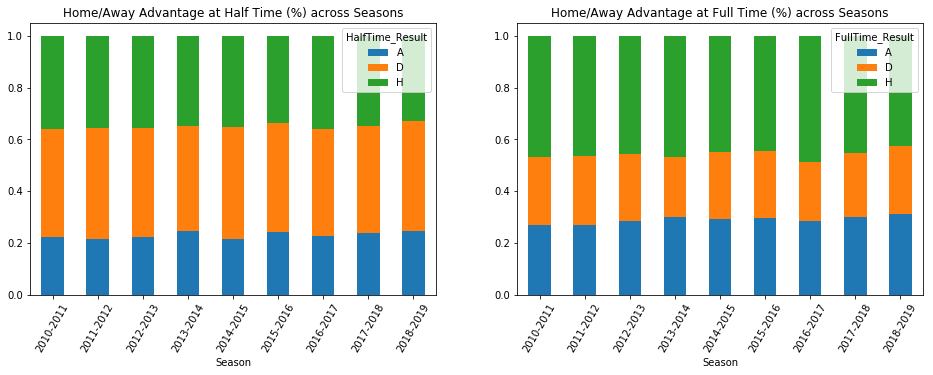

In [217]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))
df1.plot(kind='bar', stacked=True, title="Home/Away Advantage at Half Time (%) across Seasons", rot=60, ax = axes[0])
df2.plot(kind='bar', stacked=True, title="Home/Away Advantage at Full Time (%) across Seasons", rot=60, ax = axes[1])
plt.show()

Lets calculate the correlation coefficient between half time and full time results

<Figure size 432x288 with 0 Axes>

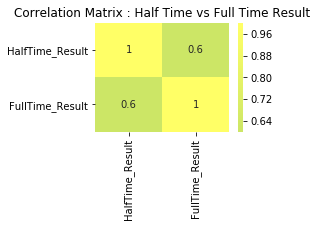

In [218]:
result_data = data[['League','Season','HalfTime_Result','FullTime_Result']].copy()
result_data['HalfTime_Result'] = result_data['HalfTime_Result'].map({'A':-1, 'H':1, 'D':0})
result_data['FullTime_Result'] = result_data['FullTime_Result'].map({'A':-1, 'H':1, 'D':0})
corr_matrix = result_data.corr().round(2)
plt.cla()
plt.clf()
f = plt.figure(figsize=(3,2))
sns.heatmap(corr_matrix, center=0, annot=True, cmap='summer')
plt.title("Correlation Matrix : Half Time vs Full Time Result")
plt.show()

There is some coorelation between half time and full time results but not exactly a linear relationship

If we calculate correlation using Spearman approach instead of Pearson approach, we get similar numbers as well

In [219]:
print(spearmanr(data['HalfTime_Result'], data['FullTime_Result'])[0])

0.5944584330392942


C:\Users\Kaustubh\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Lets look at the correlation matrix for each league

<Figure size 432x288 with 0 Axes>

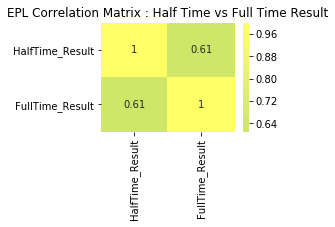

In [220]:

plt.cla()
plt.clf()

epl = result_data[result_data['League']=='EPL']
corr_matrix = epl.corr().round(2)

f = plt.figure(figsize=(3,2))
sns.heatmap(corr_matrix, center=0, annot=True, cmap='summer')
plt.title("EPL Correlation Matrix : Half Time vs Full Time Result")
plt.show()

<Figure size 432x288 with 0 Axes>

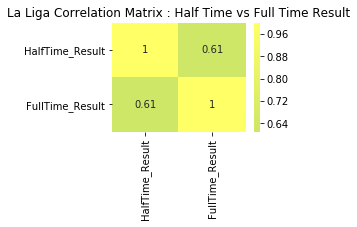

In [221]:
plt.cla()
plt.clf()

laliga = result_data[result_data['League']=='LaLiga']
corr_matrix = laliga.corr().round(2)

f = plt.figure(figsize=(3,2))
sns.heatmap(corr_matrix, center=0, annot=True, cmap='summer')
plt.title("La Liga Correlation Matrix : Half Time vs Full Time Result")
plt.show()

<Figure size 432x288 with 0 Axes>

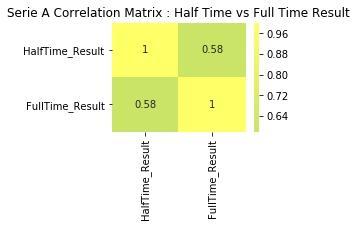

In [222]:
plt.cla()
plt.clf()

serieA = result_data[result_data['League']=='SerieA']
corr_matrix = serieA.corr().round(2)

f = plt.figure(figsize=(3,2))
sns.heatmap(corr_matrix, center=0, annot=True, cmap='summer')
plt.title("Serie A Correlation Matrix : Half Time vs Full Time Result")
plt.show()

<Figure size 432x288 with 0 Axes>

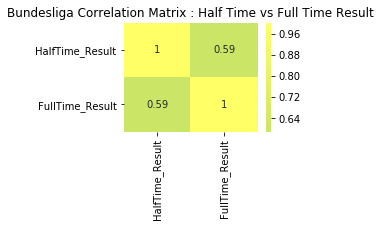

In [223]:
plt.cla()
plt.clf()

bundesliga = result_data[result_data['League']=='Bundesliga']
corr_matrix = bundesliga.corr().round(2)

f = plt.figure(figsize=(3,2))
sns.heatmap(corr_matrix, center=0, annot=True, cmap='summer')
plt.title("Bundesliga Correlation Matrix : Half Time vs Full Time Result")
plt.show()

<Figure size 432x288 with 0 Axes>

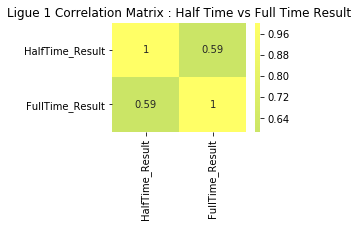

In [224]:
plt.cla()
plt.clf()

ligue1 = result_data[result_data['League']=='Ligue1']
corr_matrix = ligue1.corr().round(2)

f = plt.figure(figsize=(3,2))
sns.heatmap(corr_matrix, center=0, annot=True, cmap='summer')
plt.title("Ligue 1 Correlation Matrix : Half Time vs Full Time Result")
plt.show()

All the leagues have nearly same correlation between half time and full time results

<b> f. Home/Away Team Shots: </b> This represents the number of shots at goal attempted by home or away team during a match

<Figure size 432x288 with 0 Axes>

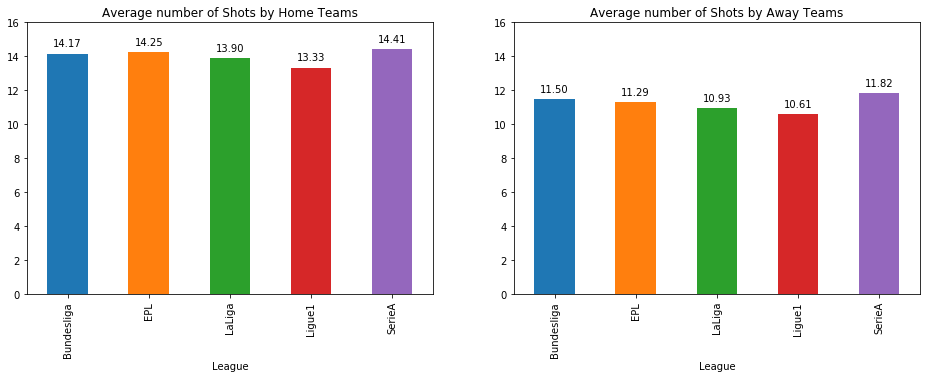

In [256]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_leagues['HomeTeam_Shots'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 16) 
ax0.set_title('Average number of Shots by Home Teams')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_leagues['AwayTeam_Shots'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 16) 
ax1.set_title('Average number of Shots by Away Teams')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Home Teams are ahead here as well. Lets look at the trend over last 10 seasons

<Figure size 432x288 with 0 Axes>

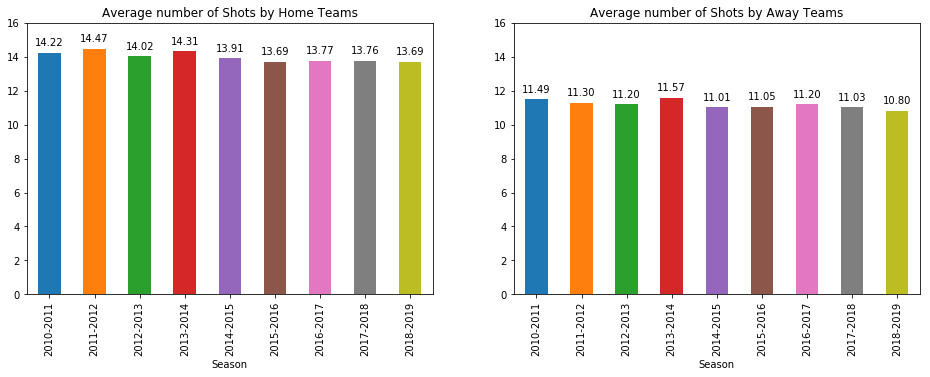

In [257]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_seasons['HomeTeam_Shots'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 16) 
ax0.set_title('Average number of Shots by Home Teams')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_seasons['AwayTeam_Shots'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 16) 
ax1.set_title('Average number of Shots by Away Teams')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Lets look at the total number of shots as well. Total Number of shots = home team shots + away team shots

In [258]:
data['TotalShots']=data['HomeTeam_Shots']+data['AwayTeam_Shots']

<Figure size 432x288 with 0 Axes>

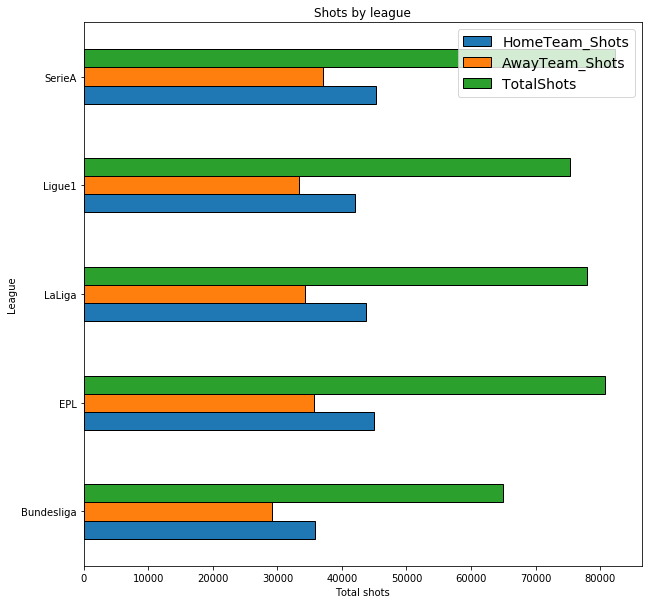

In [259]:
plt.cla()
plt.clf()
data.groupby("League").agg({"HomeTeam_Shots":"sum","AwayTeam_Shots":"sum","TotalShots":"sum"}).plot(kind="barh" ,figsize = (10,10),edgecolor = "k",linewidth =1)
plt.title("Shots by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total shots")
plt.show()

Serie A and EPL has max number of shots at goal per season.

Interestingly, La Liga leads in number of goals per season but not at number of shots whereas it is other way round for Serie A

So, we can conclude that La Liga forwards are more accurate in general as compared to Serie A forwards

<Figure size 432x288 with 0 Axes>

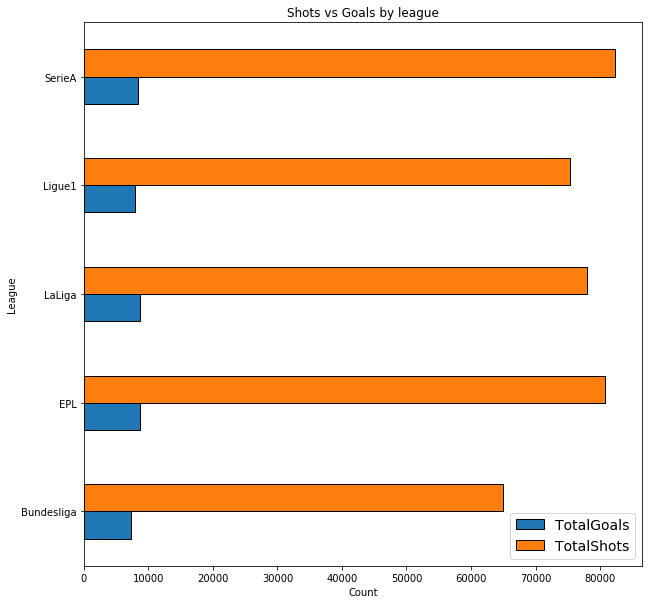

In [266]:
plt.cla()
plt.clf()
df = data.groupby("League").agg({"TotalGoals":"sum","TotalShots":"sum"})
df.plot(kind="barh" ,figsize = (10,10),edgecolor = "k",linewidth =1)
    
plt.title("Shots vs Goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Count")
plt.show()

In [268]:
df['ShotsPerGoal']=df['TotalShots']/df['TotalGoals']

<Figure size 432x288 with 0 Axes>

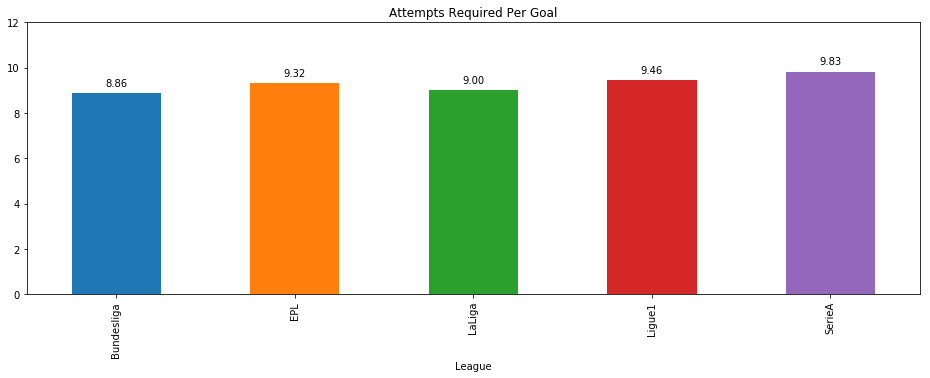

In [270]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = df['ShotsPerGoal'].plot(kind='bar')
ax.set_ylim(0, 12) 
ax.set_title('Attempts Required Per Goal')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly Strikers in Bundesliga and LaLiga are more accurate as compared to others.
Strikers in SerieA are the least effective

<Figure size 432x288 with 0 Axes>

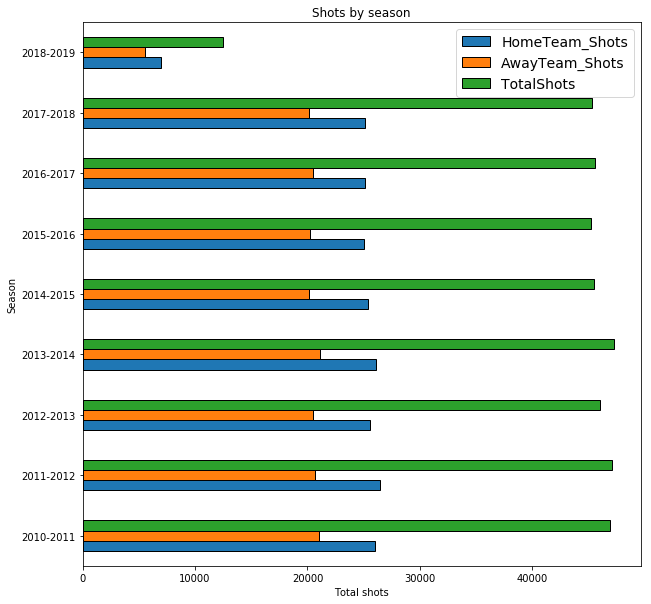

In [271]:
plt.cla()
plt.clf()
data.groupby("Season").agg({"HomeTeam_Shots":"sum","AwayTeam_Shots":"sum","TotalShots":"sum"}).plot(kind="barh" ,figsize = (10,10),edgecolor = "k",linewidth =1)
plt.title("Shots by season")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total shots")
plt.show()

In [273]:
df = data.groupby("Season").agg({"TotalGoals":"sum","TotalShots":"sum"})

In [274]:
df['ShotsPerGoal']=df['TotalShots']/df['TotalGoals']

<Figure size 432x288 with 0 Axes>

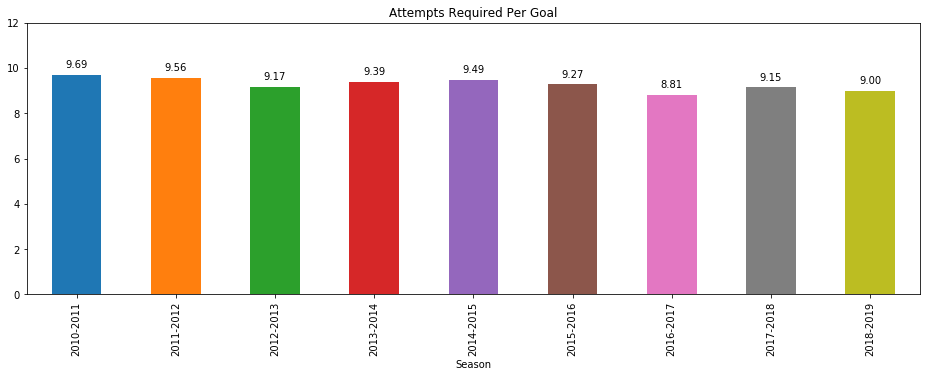

In [275]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = df['ShotsPerGoal'].plot(kind='bar')
ax.set_ylim(0, 12) 
ax.set_title('Attempts Required Per Goal')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Over the years, forwards are getting more effective. But overall change is marginal

<b>g. Home/Away team shots on target : </b> This captures the number of shots on target (scored goals or hit the bar or saved by goal keeper)

<Figure size 432x288 with 0 Axes>

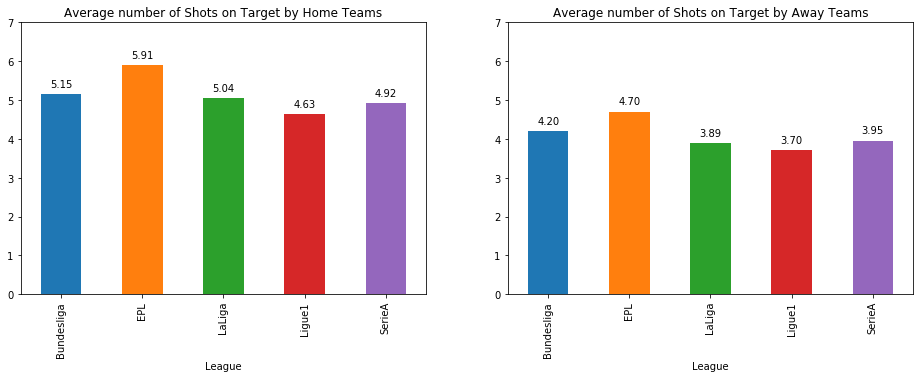

In [280]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 2 , figsize=(16,5))

ax0 = grouped_by_leagues['HomeTeam_ShotsOnTarget'].plot(kind='bar', ax = axes[0])
ax0.set_ylim(0, 7) 
ax0.set_title('Average number of Shots on Target by Home Teams')
for p in ax0.patches:
    ax0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1 = grouped_by_leagues['AwayTeam_ShotsOnTarget'].plot(kind='bar', ax = axes[1])
ax1.set_ylim(0, 7) 
ax1.set_title('Average number of Shots on Target by Away Teams')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

EPL has highest number of shots on target for both home and away team


Lets have a look at the Total number of shots on target as well. Total shots on target = Home team shots on target + Away team shots on target

In [282]:
data['TotalShotsOnTarget']=data['HomeTeam_ShotsOnTarget']+data['AwayTeam_ShotsOnTarget']

<Figure size 432x288 with 0 Axes>

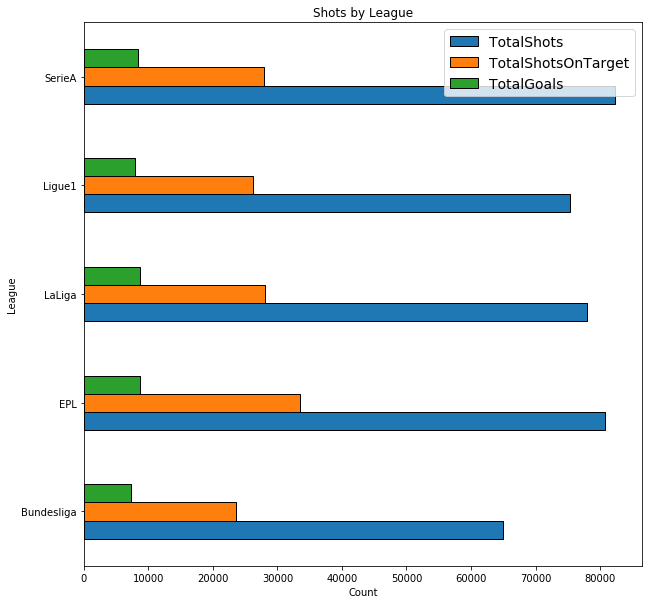

In [283]:
plt.cla()
plt.clf()
data.groupby("League").agg({"TotalShots":"sum","TotalShotsOnTarget":"sum","TotalGoals":"sum"}).plot(kind="barh" ,figsize = (10,10),edgecolor = "k",linewidth =1)
plt.title("Shots by League")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Count")
plt.show()

In [285]:
df = data.groupby("League").agg({"TotalGoals":"sum","TotalShots":"sum","TotalShotsOnTarget":"sum"})
df['OnTargetShotRate']=df['TotalShotsOnTarget']/df['TotalShots']
df['SuccessRate']=df['TotalGoals']/df['TotalShotsOnTarget']

<Figure size 432x288 with 0 Axes>

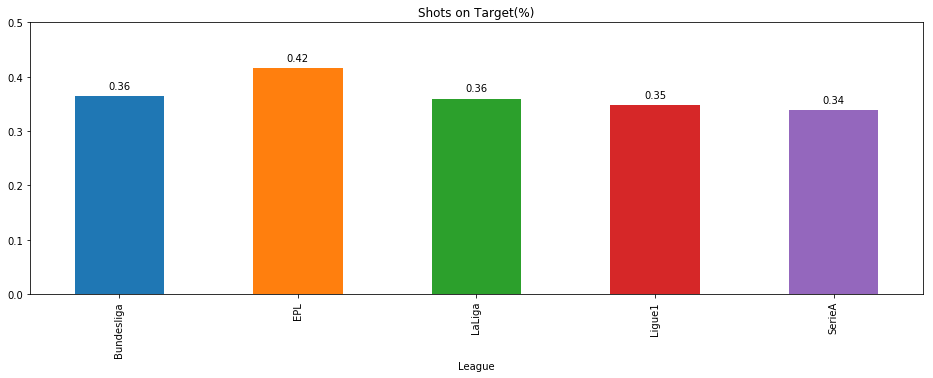

In [289]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = df['OnTargetShotRate'].plot(kind='bar')
ax.set_ylim(0, 0.5) 
ax.set_title('Shots on Target(%)')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Clearly EPL forwards land the maximum proportion of shots on target

<Figure size 432x288 with 0 Axes>

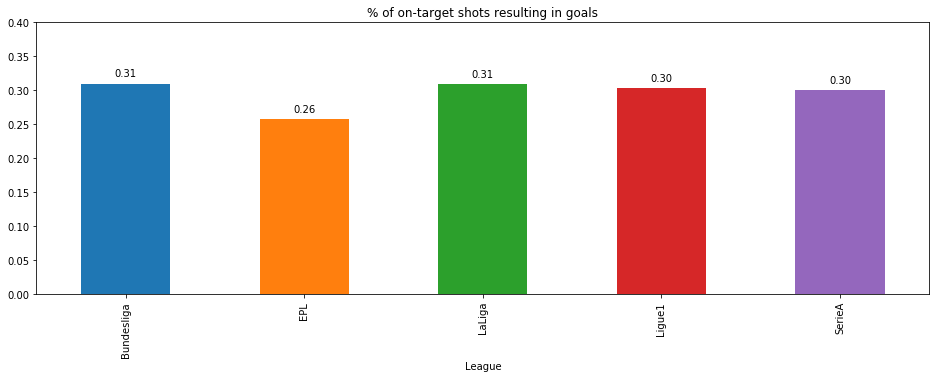

In [292]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = df['SuccessRate'].plot(kind='bar')
ax.set_ylim(0, 0.4) 
ax.set_title('% of on-target shots resulting in goals')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

However, EPL ranks behind all other leagues in converting on target shots into goals

<b> i. Home/Away team fouls committed </b> : Number of fouls committed by Home or Away team in a game